In [ ]:
import os
os.chdir(r"/content/drive/MyDrive/Internship/data")

In [ ]:
import pandas as pd
import re
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re, string, unicodedata
import nltk
from collections import Counter

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report


import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data = pd.read_csv('ytb_spam_comment.csv',encoding="ISO-8859-1")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  1441 non-null   object
dtypes: object(1)
memory usage: 11.4+ KB


In [ ]:
data.head(10)

,Comment
0,I can't believe Pewds was brave enough to post...
1,"Thanks for thinking of us Felix, we appreciate..."
2,"But imagine them asking""What are you in for?""A..."
3,i donât think iâve ever experienced a yout...
4,*Started in 1966*Also Pewds: I can't believe i...
5,"I don't know why, but something about pewds ma..."
6,"Usually, a Pug's lifespan is 12-15 years but M..."
7,I love that Pewds has retired but not really ...
8,Always happy to se the GÃ¤vle goat talked abou...
9,Here in the US in Northern Kentucky my parentâ...


In [ ]:
data['char_len']= data['Comment'].apply(len)
data.head(10)

,Comment,char_len
0,I can't believe Pewds was brave enough to post...,58
1,"Thanks for thinking of us Felix, we appreciate...",126
2,"But imagine them asking""What are you in for?""A...",86
3,i donât think iâve ever experienced a yout...,275
4,*Started in 1966*Also Pewds: I can't believe i...,79
5,"I don't know why, but something about pewds ma...",301
6,"Usually, a Pug's lifespan is 12-15 years but M...",141
7,I love that Pewds has retired but not really ...,97
8,Always happy to se the GÃ¤vle goat talked abou...,88
9,Here in the US in Northern Kentucky my parentâ...,452


In [ ]:
data['word_len'] = data['Comment'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head(10)

,Comment,char_len,word_len
0,I can't believe Pewds was brave enough to post...,58,12
1,"Thanks for thinking of us Felix, we appreciate...",126,25
2,"But imagine them asking""What are you in for?""A...",86,23
3,i donât think iâve ever experienced a yout...,275,50
4,*Started in 1966*Also Pewds: I can't believe i...,79,21
5,"I don't know why, but something about pewds ma...",301,67
6,"Usually, a Pug's lifespan is 12-15 years but M...",141,32
7,I love that Pewds has retired but not really ...,97,21
8,Always happy to se the GÃ¤vle goat talked abou...,88,16
9,Here in the US in Northern Kentucky my parentâ...,452,95


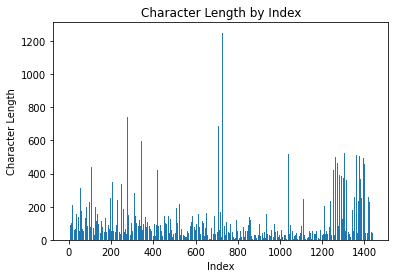

In [ ]:
plt.bar(data.index, data['char_len'])

plt.rcParams["figure.dpi"] = 360
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Character Length')
plt.title('Character Length by Index')

# Show the plot
plt.show()

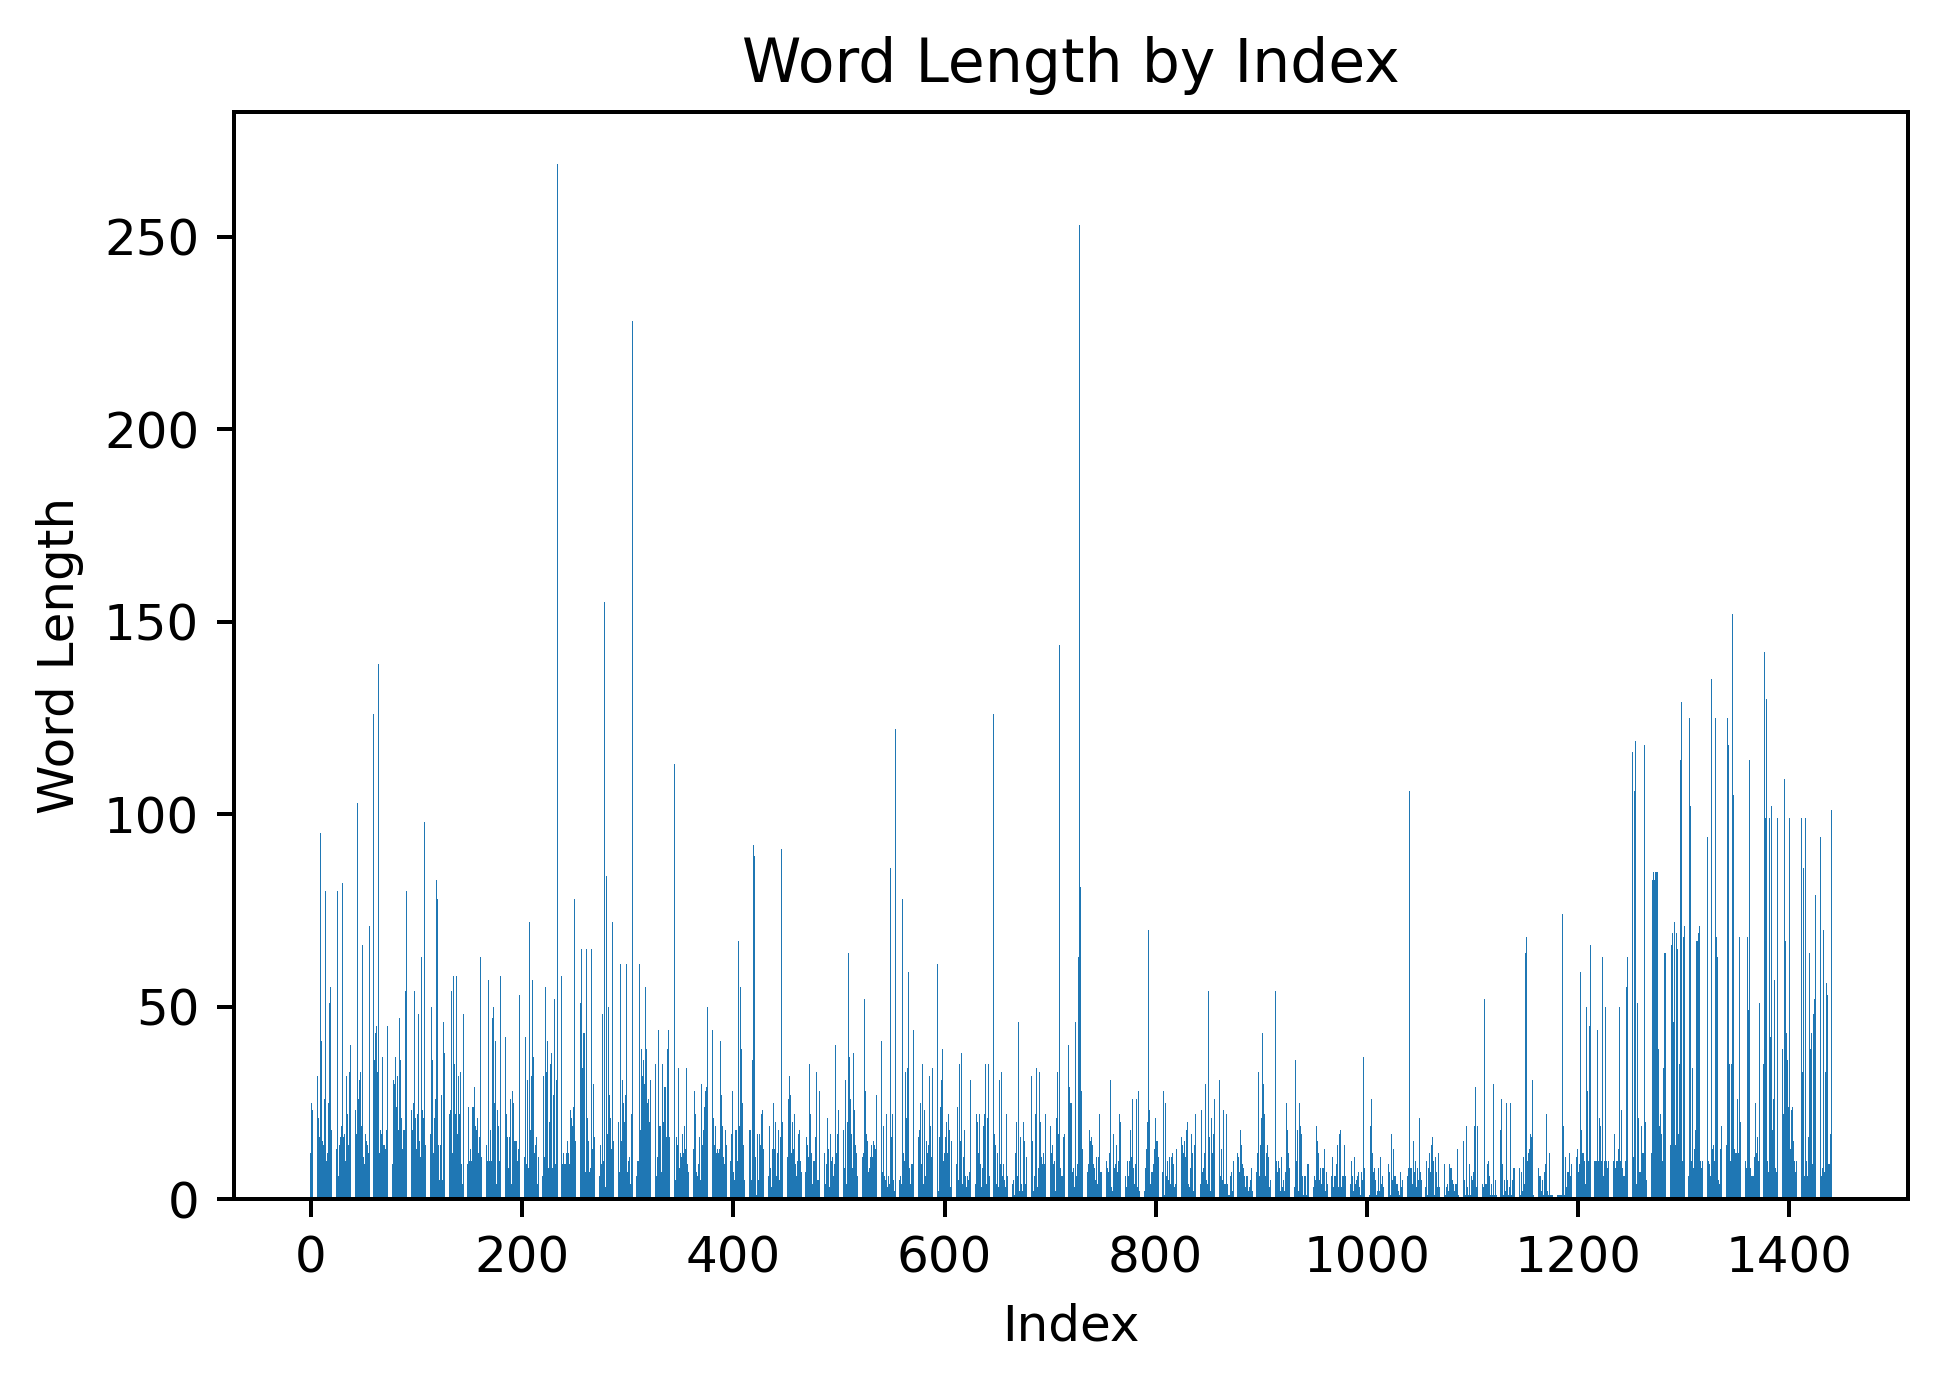

In [ ]:
plt.bar(data.index, data['word_len'])
plt.rcParams["figure.dpi"] = 360
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Word Length')
plt.title('Word Length by Index')

# Show the plot
plt.show()

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def preprocessing(comment):
    comment = comment.lower()
    comment = re.sub('[â]', '', comment)
    comment = re.sub('[ã¤]', '', comment)
    comment = re.sub('[]', '', comment)
    comment = re.sub(r'[^\w\s]', ' ', comment)
    # comment= ''.join([i for i in comment if i not in string.punctuation])
    all_stopwords = stopwords.words('english')
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(comment)
    comment = [word for word in tokens if not word in all_stopwords]
    # porter = PorterStemmer()
    wordnet_lemmatizer = WordNetLemmatizer()
    # comment = [porter.stem(word) for word in comment]
    comment = [wordnet_lemmatizer.lemmatize(word) for word in comment]
    preprocessed_text = " ".join(comment)
    return preprocessed_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data['Comment']=data['Comment'].apply(lambda x:preprocessing(x))
data.head()

,Comment,char_len,word_len
0,believe pewds brave enough post prison,58,12
1,thanks thinking u felix appreciate uploads lon...,126,25
2,imagine asking proudly say burnt goat,86,23
3,dont think ive ever experienced youtube video ...,275,50
4,started 1966 also pewds believe going 80 year,79,21


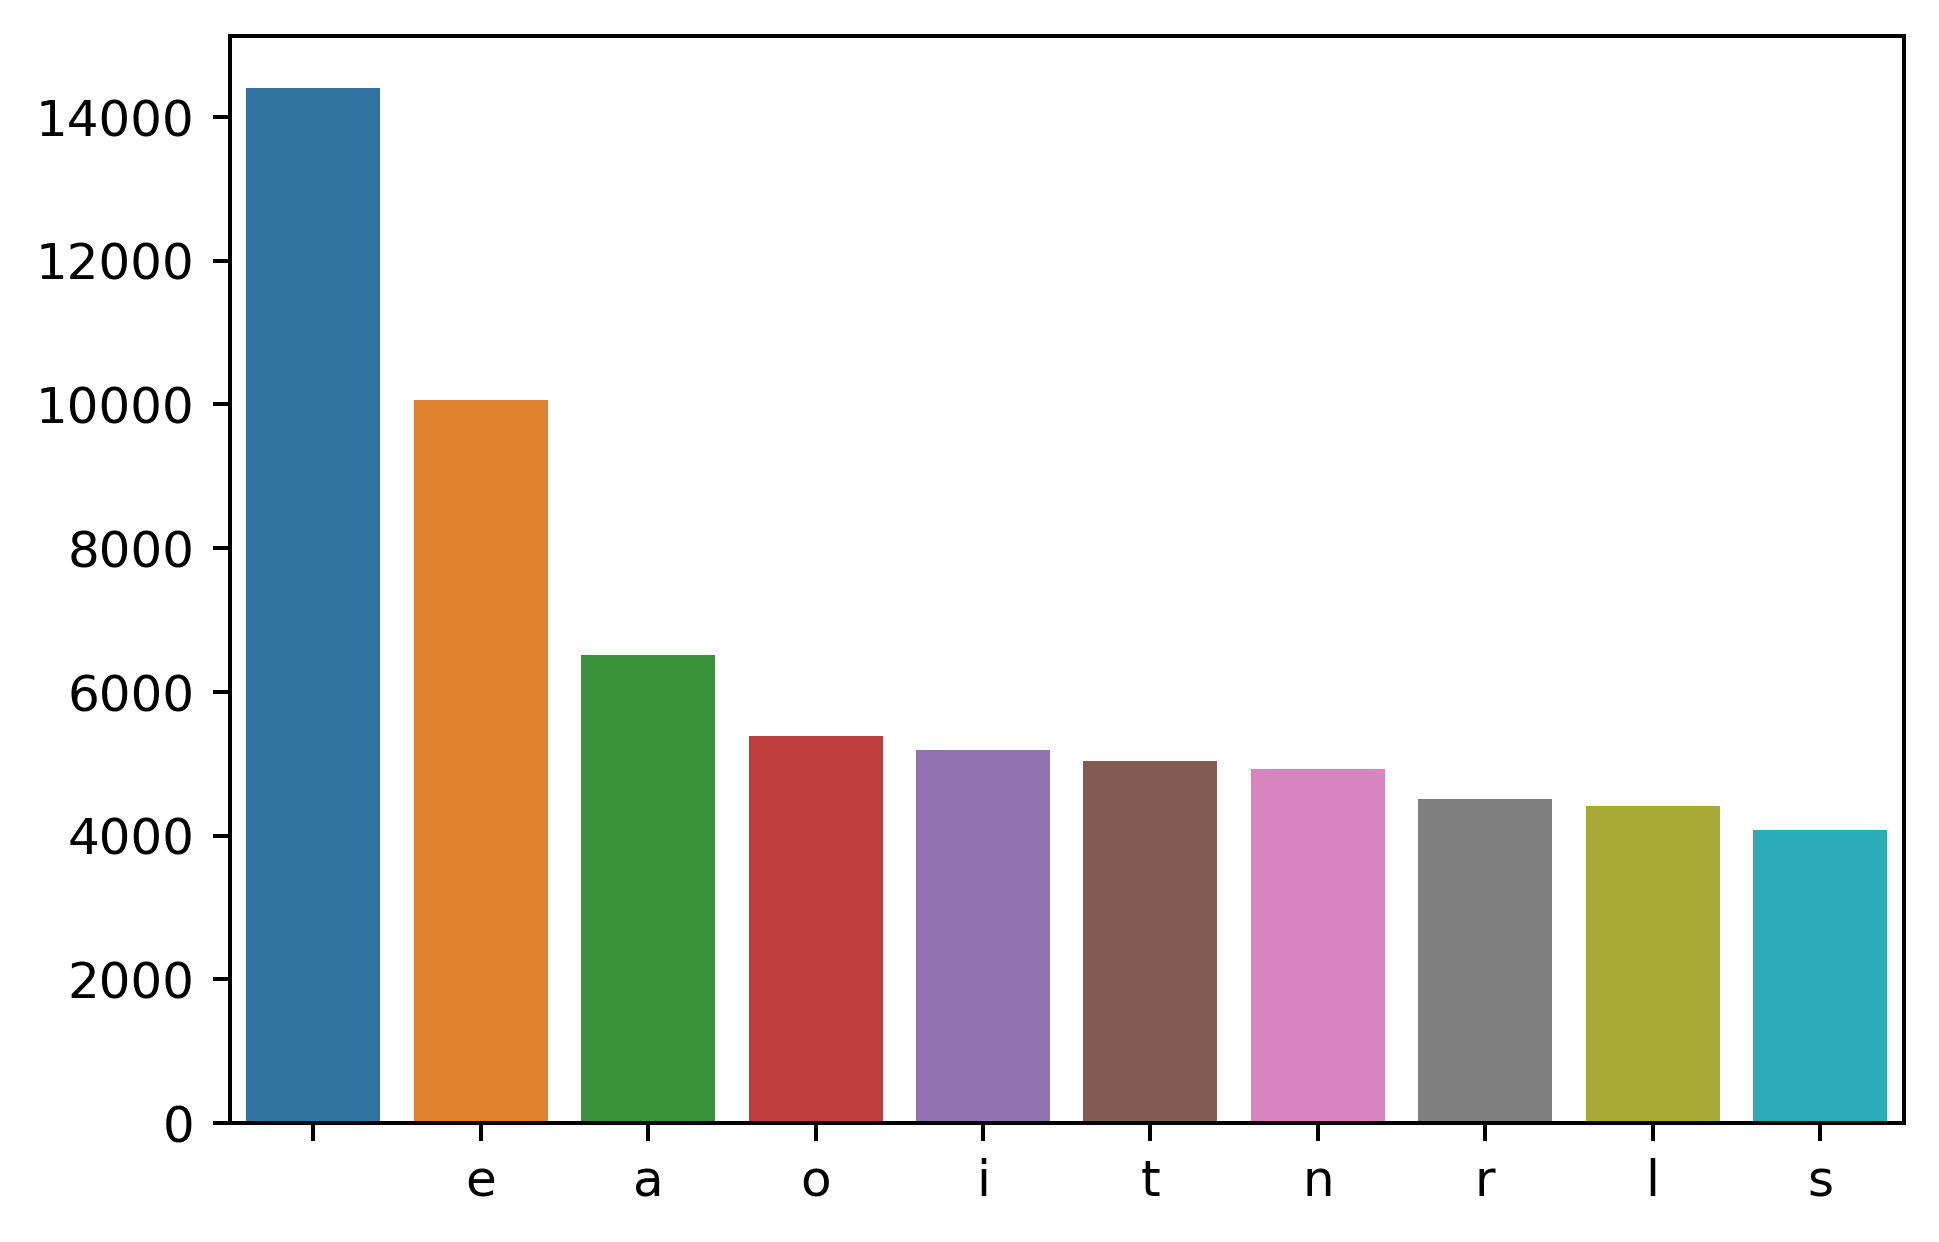

In [ ]:
# # Get a list of all the tokens in the 'Comment' column
all_tokens = [tokens for sublist in data['Comment'] for tokens in sublist]

# # Count the frequency of each word
word_counts = Counter(all_tokens)

# # Get the top N most common words
N = 10
top_words = word_counts.most_common(N)

# # Extract the words and their frequencies into separate lists
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

plt.rcParams["figure.dpi"] = 360
plt.bar(words, counts)

# Set the color palette
# sns.set_palette(sns.color_palette("hls", 10))

sns.barplot(x=words, y=counts)
plt.show()

### EDA

In [ ]:
data.nunique()

Comment     1366
char_len     331
word_len     116
dtype: int64

In [ ]:
data.isnull().sum()

Comment     0
char_len    0
word_len    0
dtype: int64

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Comment,1441,1366,check video youtube ï,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
char_len,1441.0,NaN,NaN,NaN,104.934768,125.595161,1.0,34.0,61.0,121.0,1251.0
word_len,1441.0,NaN,NaN,NaN,22.44136,26.622819,1.0,7.0,13.0,26.0,269.0


In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Comment'], dtype='object')
Numerical Variables:
['char_len', 'word_len']


In [ ]:
data.head()

,Comment,char_len,word_len
0,believe pewds brave enough post prison,58,12
1,thanks thinking u felix appreciate uploads lon...,126,25
2,imagine asking proudly say burnt goat,86,23
3,dont think ive ever experienced youtube video ...,275,50
4,started 1966 also pewds believe going 80 year,79,21


In [ ]:
pip install snorkel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from snorkel.labeling import labeling_function
import re

HAM = 0
SPAM = 1

@labeling_function()
def click(x):
    return SPAM if "click" in x.Comment.lower() else HAM
@labeling_function()
def link(x):
    return SPAM if "link" in x.Comment.lower() else HAM

@labeling_function()
def free(x):
    return SPAM if "free" in x.Comment.lower() else HAM

@labeling_function()
def subscribes(x):
   return SPAM if "subscribes" in x.Comment.lower() else HAM

@labeling_function()
def claim(x):
   return SPAM if "claim" in x.Comment.lower() else HAM

@labeling_function()
def check_out(x):
   return SPAM if "check out" in x.Comment.lower() else HAM
  
@labeling_function()
def check_on(x):
   return SPAM if "check on" in x.Comment.lower() else HAM

@labeling_function()
def check(x):
   return SPAM if "check" in x.Comment.lower() else HAM

@labeling_function()
def subscribe(x):
   return SPAM if "subscribe" in x.Comment.lower() else HAM

@labeling_function()
def winners(x):
   return SPAM if "winners" in x.Comment.lower() else HAM

@labeling_function()
def profile(x):
   return SPAM if "channel" in x.Comment.lower() else HAM

@labeling_function()
def sub(x):
   return SPAM if "sub" in x.Comment.lower() else HAM


@labeling_function()
def page(x):
   return SPAM if "page" in x.Comment.lower() else HAM

@labeling_function()
def test(x):
  keywords = ["check","check out"]
  return SPAM if any(word in x.Comment.lower() for word in keywords) else HAM


@labeling_function()
def url(x):
  keywords = ["http","https"]
  return SPAM if any(word in x.Comment.lower() for word in keywords) else HAM

@labeling_function()
def regex_url(x):
  return SPAM if re.findall(r"https.*:",x.Comment,flags=re.I) else HAM

In [ ]:
from snorkel.labeling import PandasLFApplier
lfs = [click,link,free,subscribe,claim,check_out,check_on,check,winners,profile,sub,page,test,url,regex_url]
applier = PandasLFApplier(lfs=lfs)
L_train = applier.apply(df=data)

100%|██████████| 1441/1441 [00:00<00:00, 3098.66it/s]


In [ ]:
L_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from snorkel.labeling import LFAnalysis
LFAnalysis(L=L_train, lfs=lfs).lf_summary()

,j,Polarity,Coverage,Overlaps,Conflicts
click,0,"[0, 1]",1.0,1.0,0.184594
link,1,"[0, 1]",1.0,1.0,0.184594
free,2,"[0, 1]",1.0,1.0,0.184594
subscribe,3,"[0, 1]",1.0,1.0,0.184594
claim,4,"[0, 1]",1.0,1.0,0.184594
check_out,5,[0],1.0,1.0,0.184594
check_on,6,"[0, 1]",1.0,1.0,0.184594
check,7,"[0, 1]",1.0,1.0,0.184594
winners,8,[0],1.0,1.0,0.184594
profile,9,"[0, 1]",1.0,1.0,0.184594


In [ ]:
from snorkel.labeling.model import LabelModel

label_model = LabelModel(cardinality=2,verbose=True)
label_model.fit(L_train=L_train,n_epochs=500,log_freq=100,seed=123)

100%|██████████| 500/500 [00:00<00:00, 1024.70epoch/s]


In [ ]:
data['Labels'] = label_model.predict(L=L_train,tie_break_policy="ham")

In [ ]:
data

,Comment,char_len,word_len,Labels
0,believe pewds brave enough post prison,58,12,0
1,thanks thinking u felix appreciate uploads lon...,126,25,0
2,imagine asking proudly say burnt goat,86,23,0
3,dont think ive ever experienced youtube video ...,275,50,0
4,started 1966 also pewds believe going 80 year,79,21,0
...,...,...,...,...
1436,know sean kingston got famous 39 look kid hard...,218,53,1
1437,check eminem latest track survival u didnt,49,9,1
1438,subscribe channel x please spare,40,9,1
1439,check video guy hope guy good laugh,61,17,1


In [ ]:
data.to_csv('data_with_label.csv', index=False)

In [ ]:
data['char_len']= data['Comment'].apply(len)
data.head(10)

,Comment,char_len,word_len,Labels
0,believe pewds brave enough post prison,38,12,0
1,thanks thinking u felix appreciate uploads lon...,81,25,0
2,imagine asking proudly say burnt goat,37,23,0
3,dont think ive ever experienced youtube video ...,180,50,0
4,started 1966 also pewds believe going 80 year,45,21,0
5,know something pewds make feel like friend kno...,161,67,0
6,usually pug lifespan 12 15 year maya 17 passed...,84,32,0
7,love pewds retired really living life enjoys,44,21,0
8,always happy se gvle goat talked outside swede...,67,16,0
9,u northern kentucky parent neighbor build gvle...,267,95,0


In [ ]:
#getting the number of words in each sms into a new column
data['word_len'] = data['Comment'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head(10)

,Comment,char_len,word_len,Labels
0,believe pewds brave enough post prison,38,6,0
1,thanks thinking u felix appreciate uploads lon...,81,12,0
2,imagine asking proudly say burnt goat,37,6,0
3,dont think ive ever experienced youtube video ...,180,26,0
4,started 1966 also pewds believe going 80 year,45,8,0
5,know something pewds make feel like friend kno...,161,26,0
6,usually pug lifespan 12 15 year maya 17 passed...,84,15,0
7,love pewds retired really living life enjoys,44,7,0
8,always happy se gvle goat talked outside swede...,67,11,0
9,u northern kentucky parent neighbor build gvle...,267,44,0


In [ ]:
data.describe()

,char_len,word_len,Labels
count,1441.000000,1441.000000,1441.000000
mean,65.796669,10.998612,0.172103
std,77.687790,12.390689,0.377601
min,0.000000,0.000000,0.000000
25%,21.000000,4.000000,0.000000
50%,40.000000,7.000000,0.000000
75%,76.000000,13.000000,0.000000
max,806.000000,119.000000,1.000000


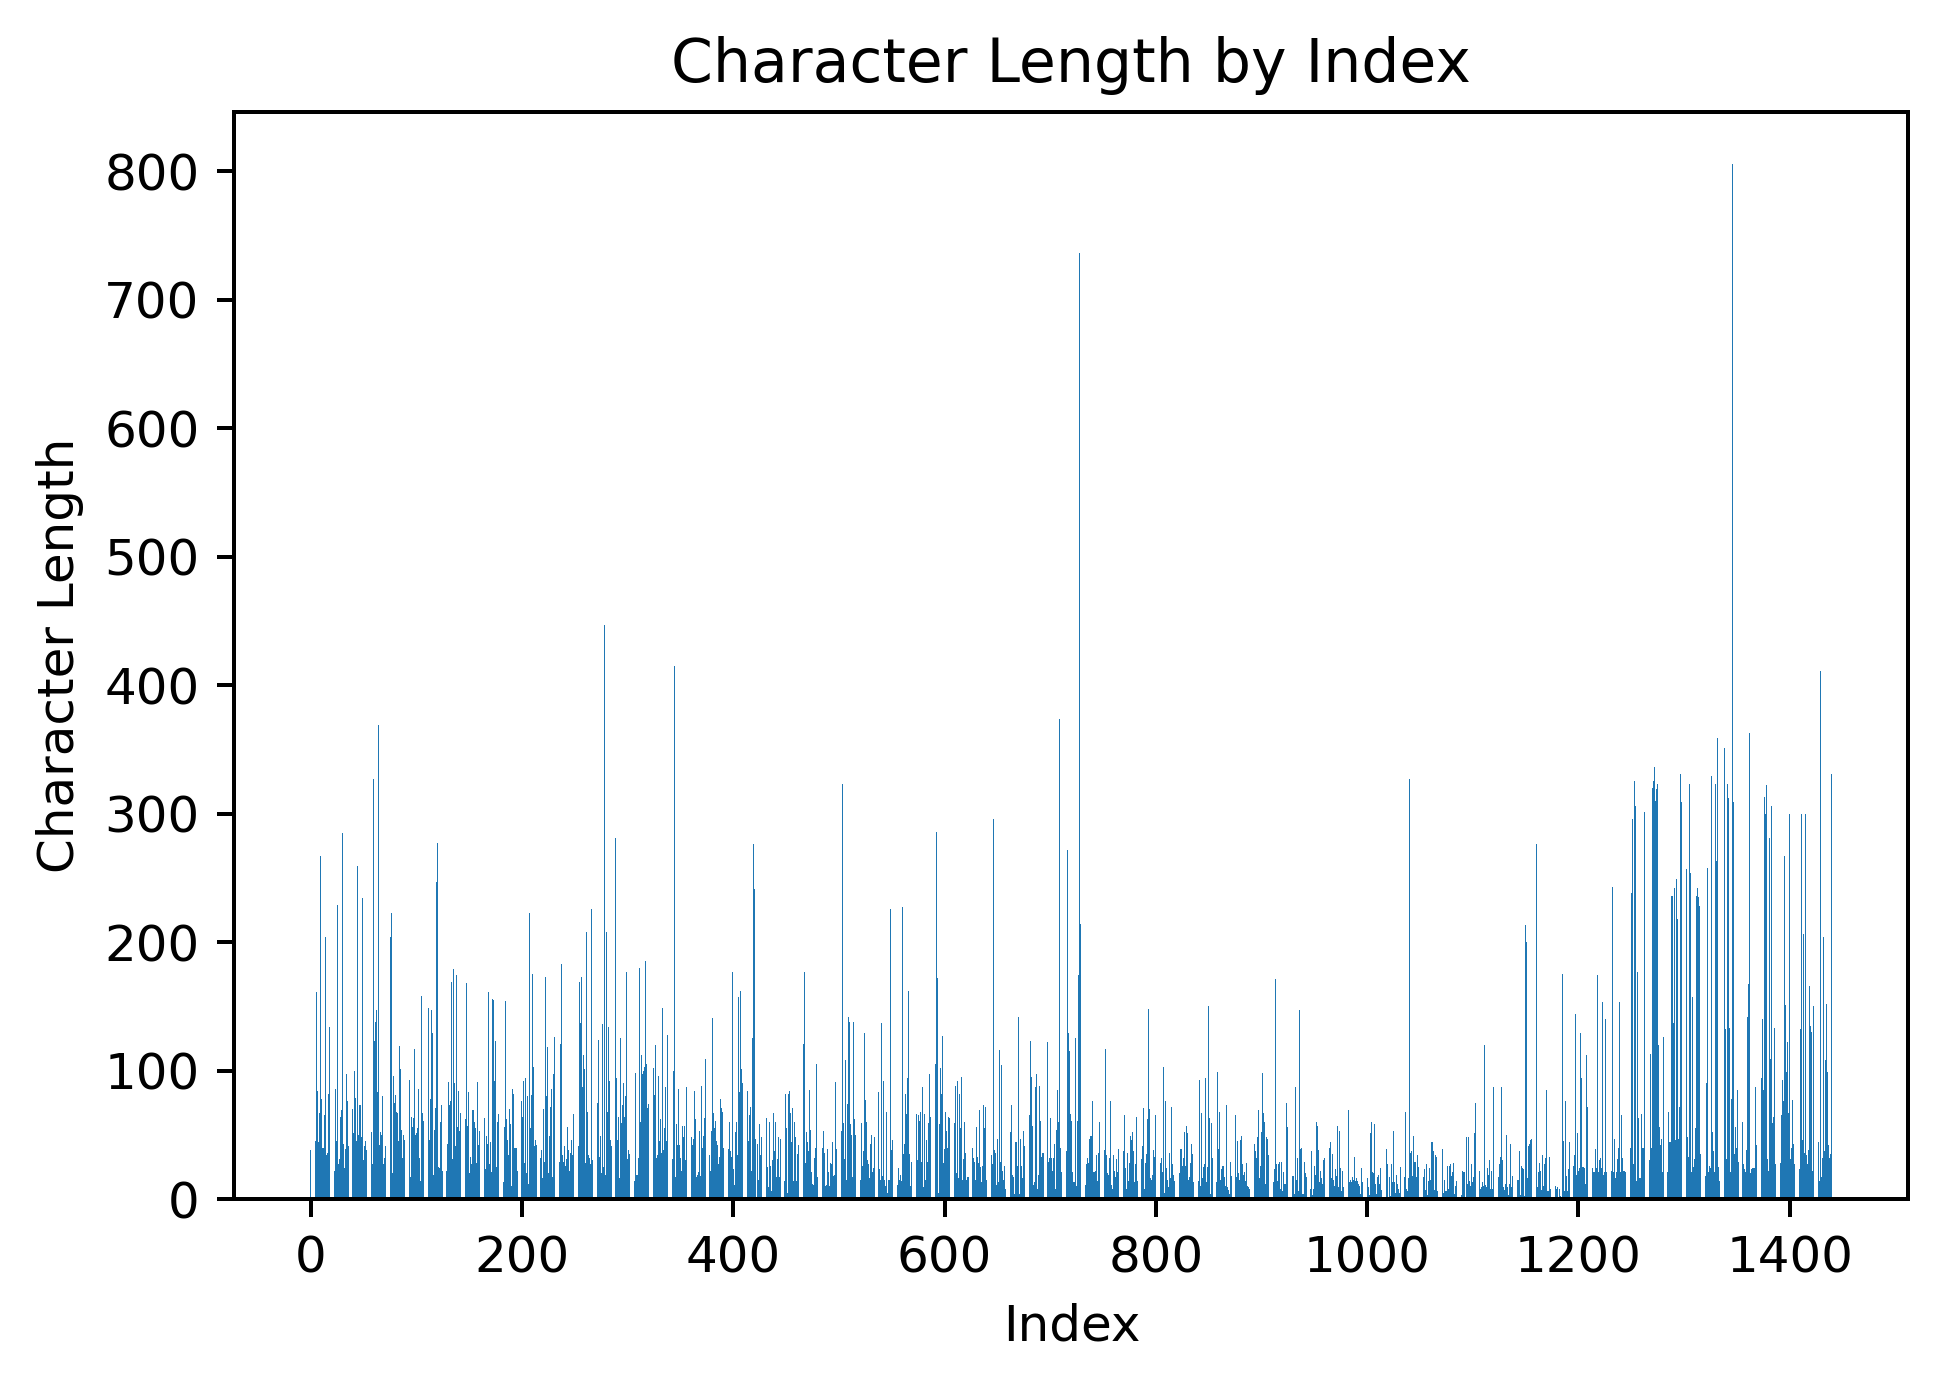

In [ ]:
plt.bar(data.index, data['char_len'])

plt.rcParams["figure.dpi"] = 360
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Character Length')
plt.title('Character Length by Index')

# Show the plot
plt.show()

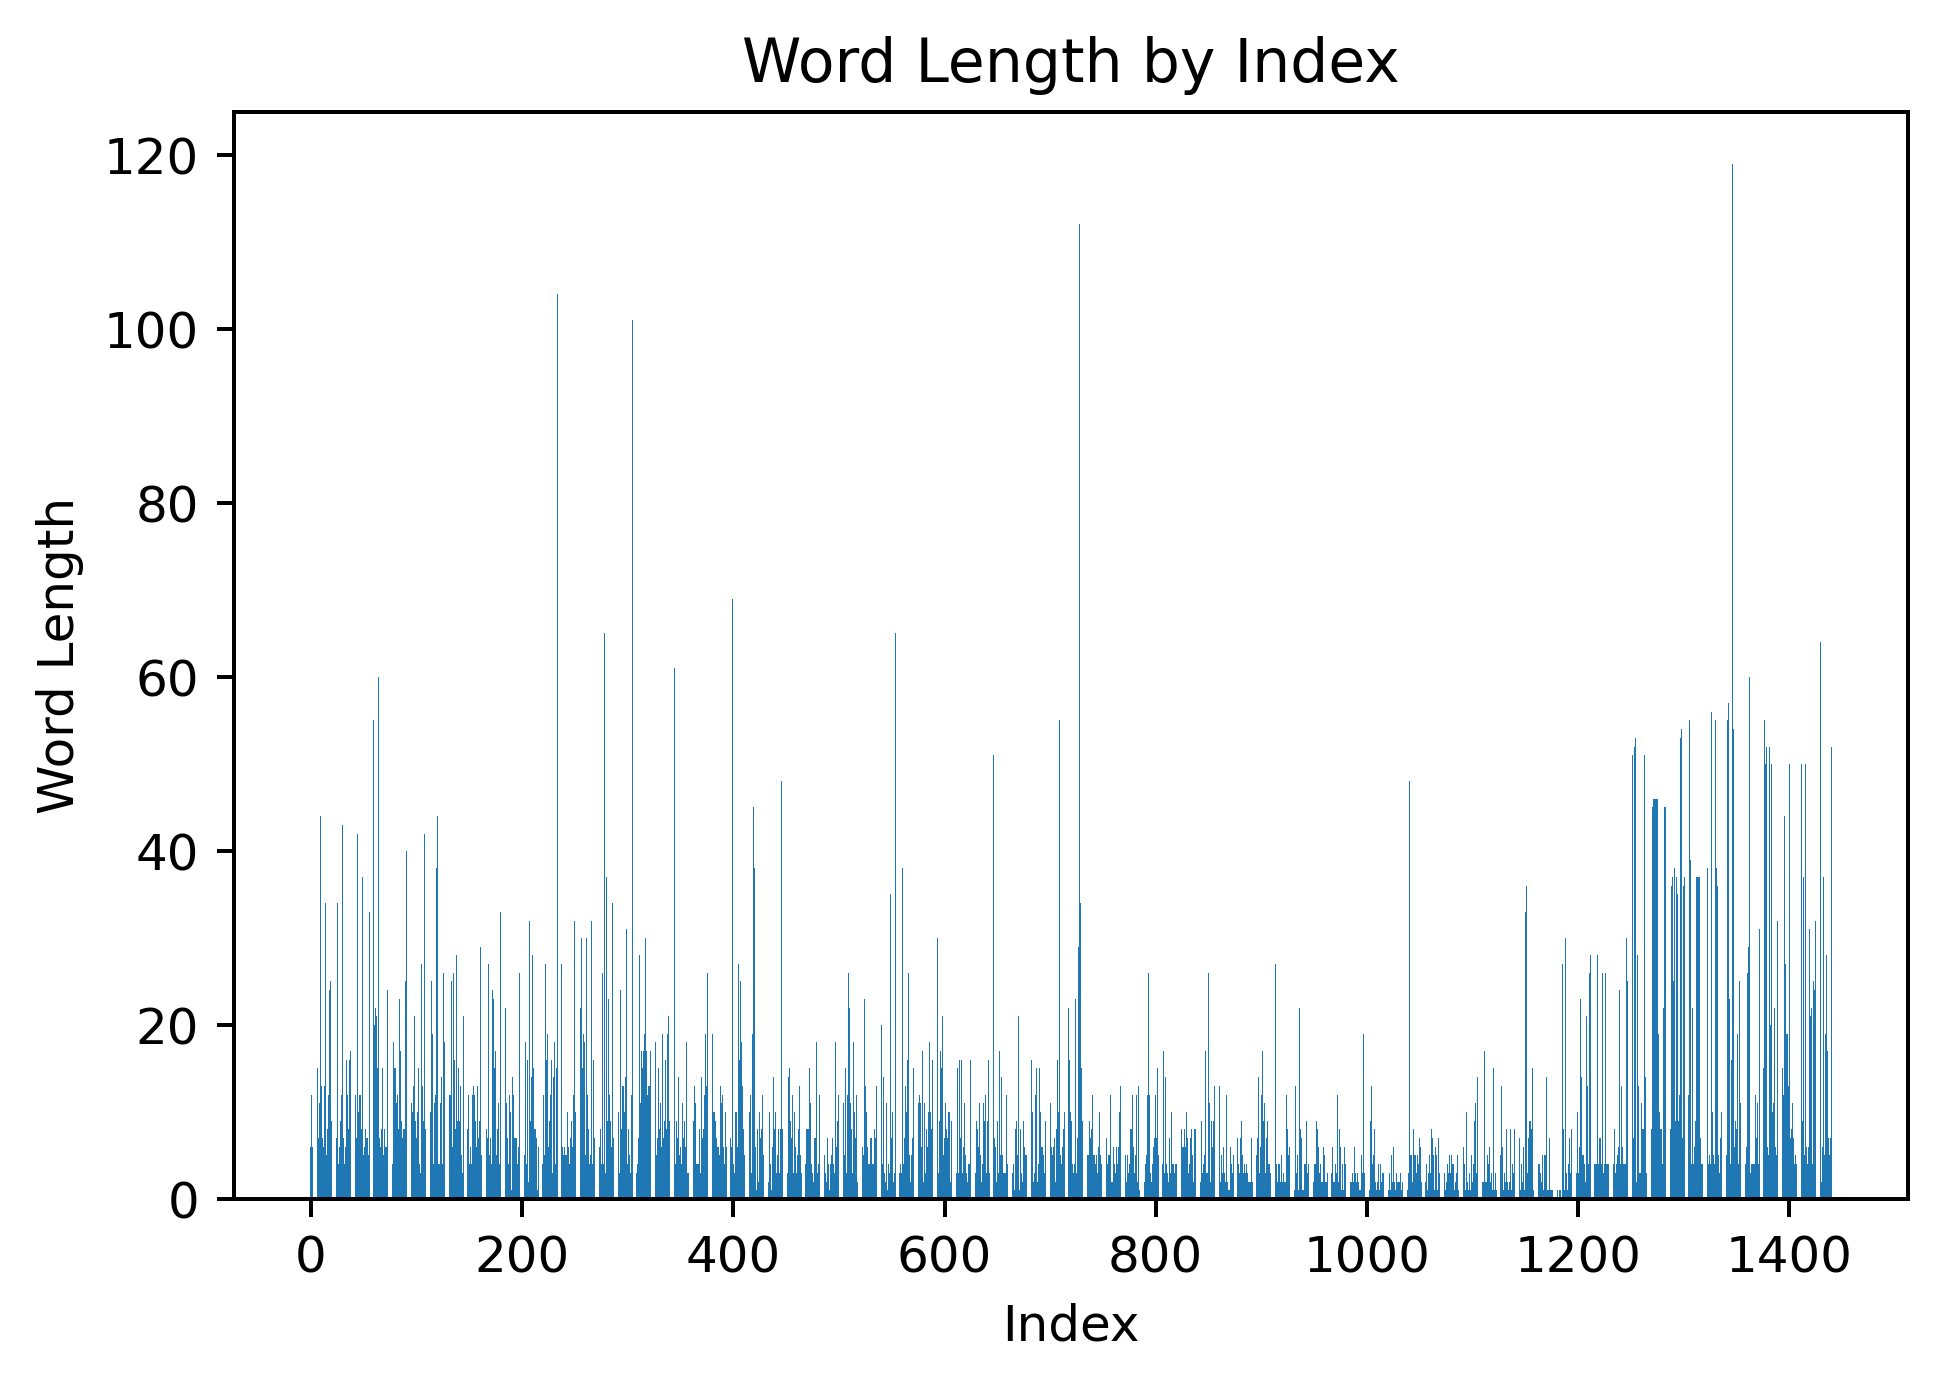

In [ ]:
plt.bar(data.index, data['word_len'])

plt.rcParams["figure.dpi"] = 360
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Word Length')
plt.title('Word Length by Index')

# Show the plot
plt.show()

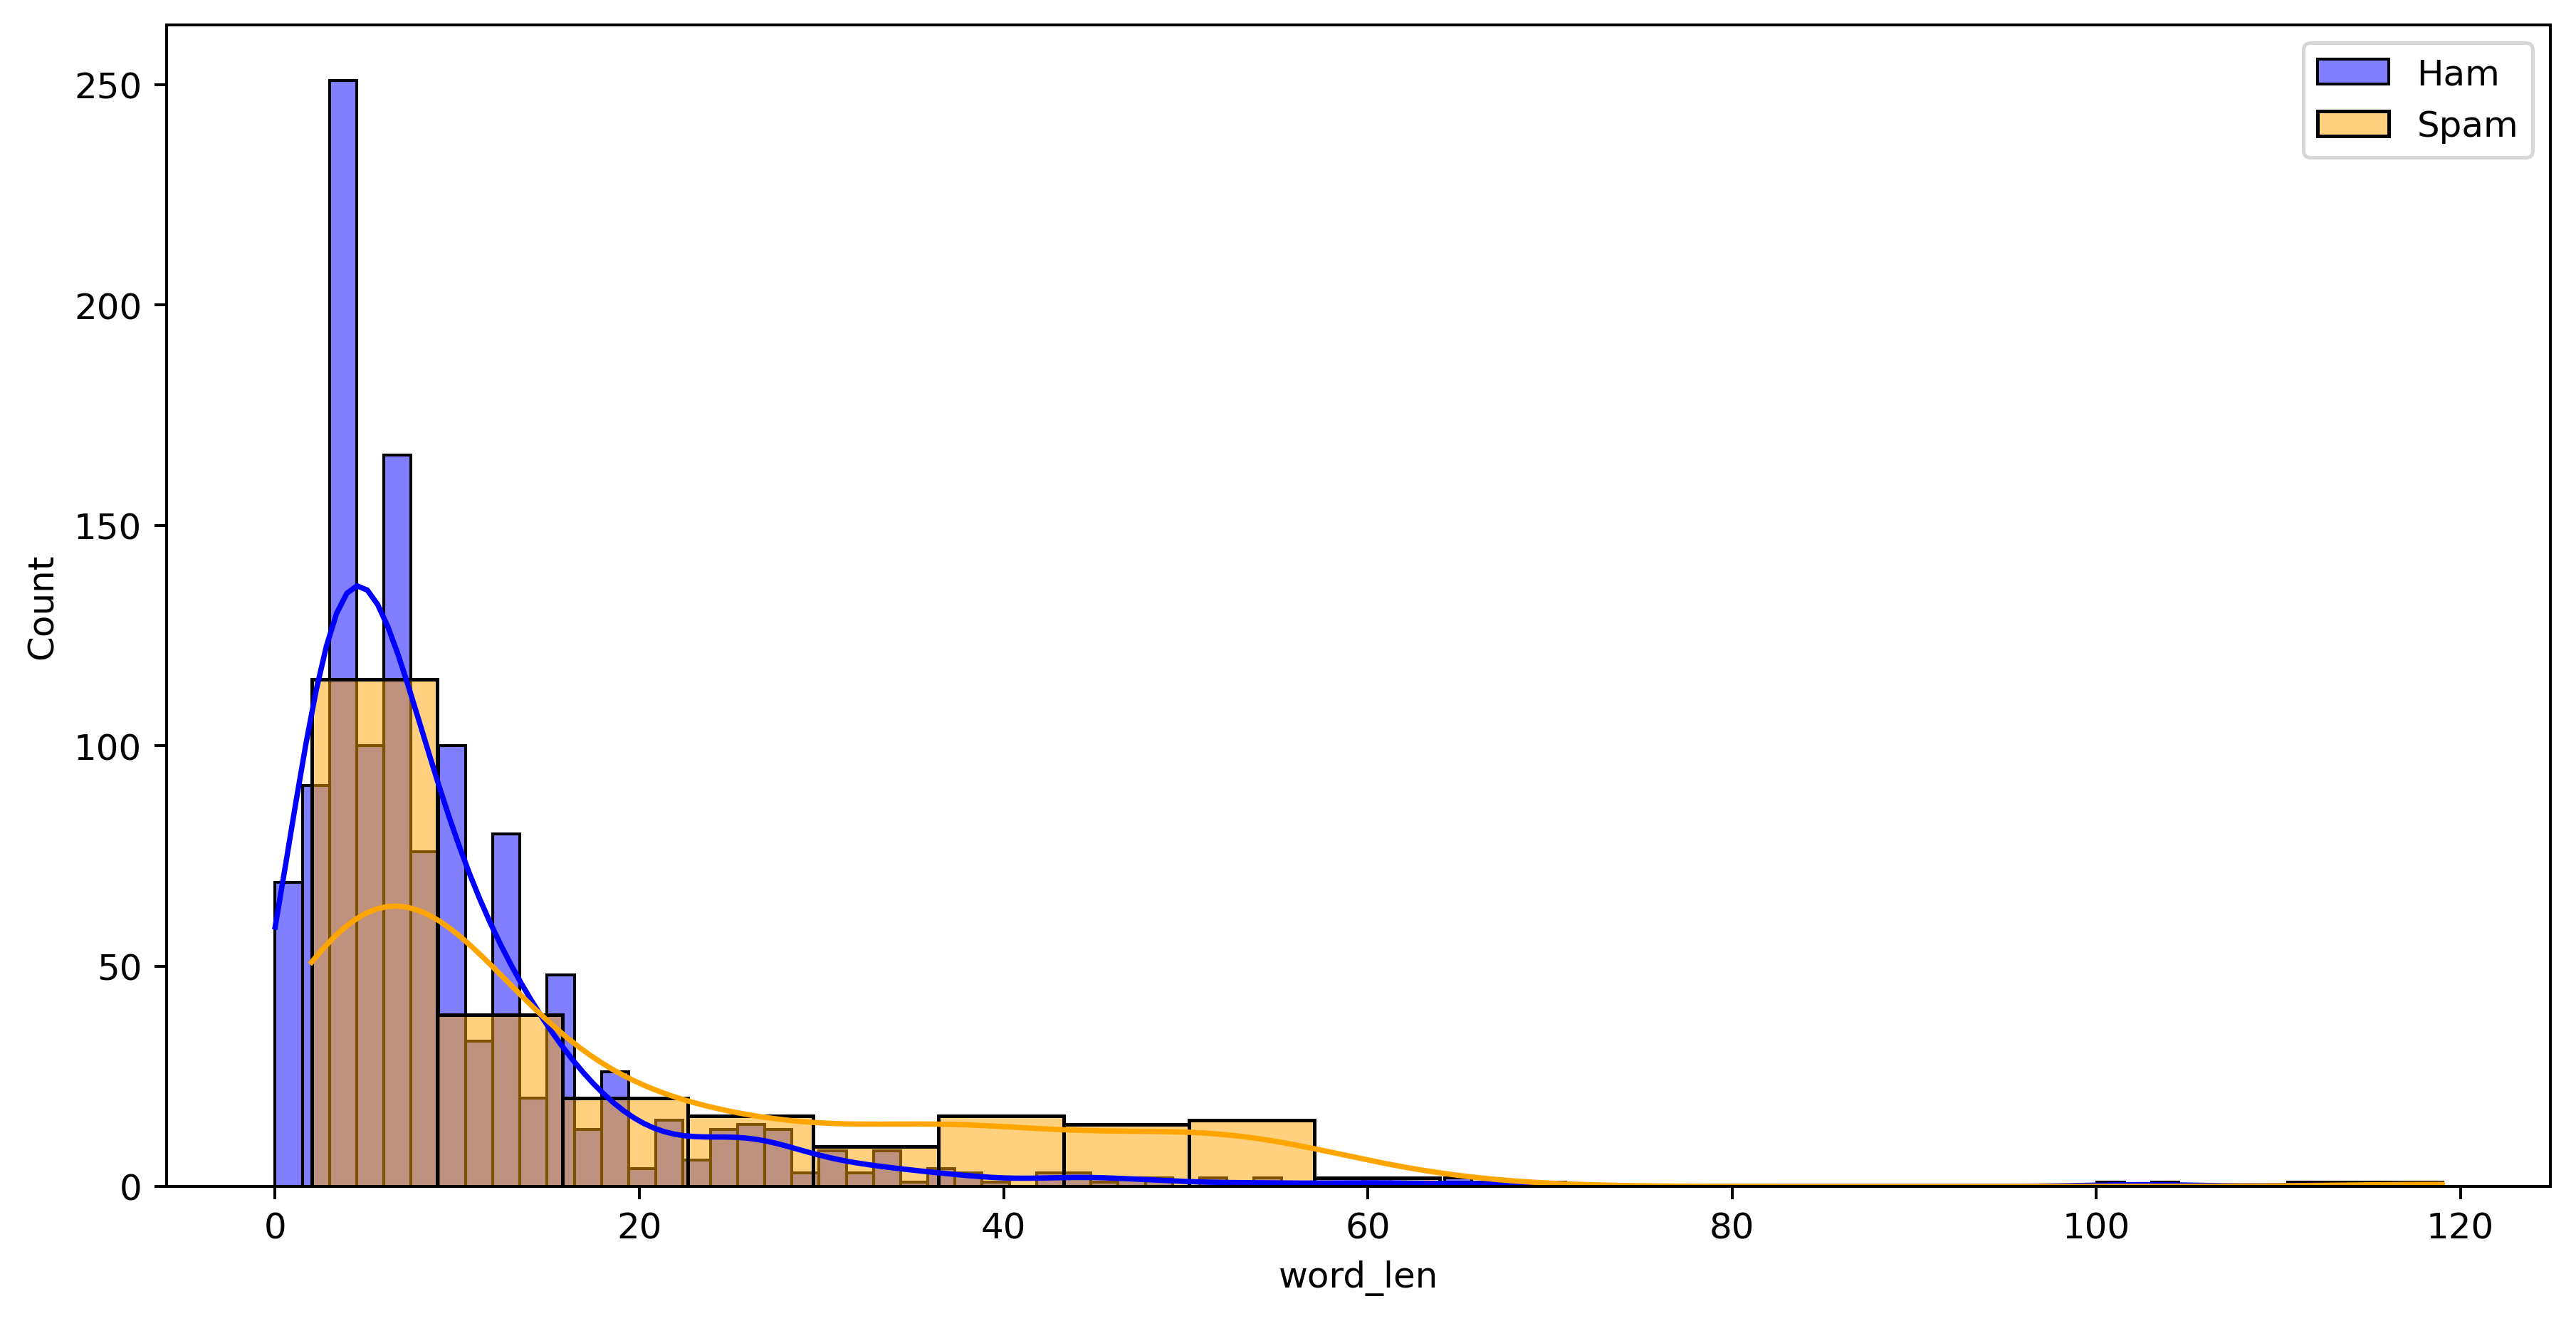

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams["figure.dpi"] = 360
sns.histplot(data= data[data['Labels']==0], x="word_len", color="blue", label="Ham", kde=True)
sns.histplot(data= data[data['Labels']==1], x="word_len", color="orange", label="Spam", kde=True)
plt.legend() 
plt.show()

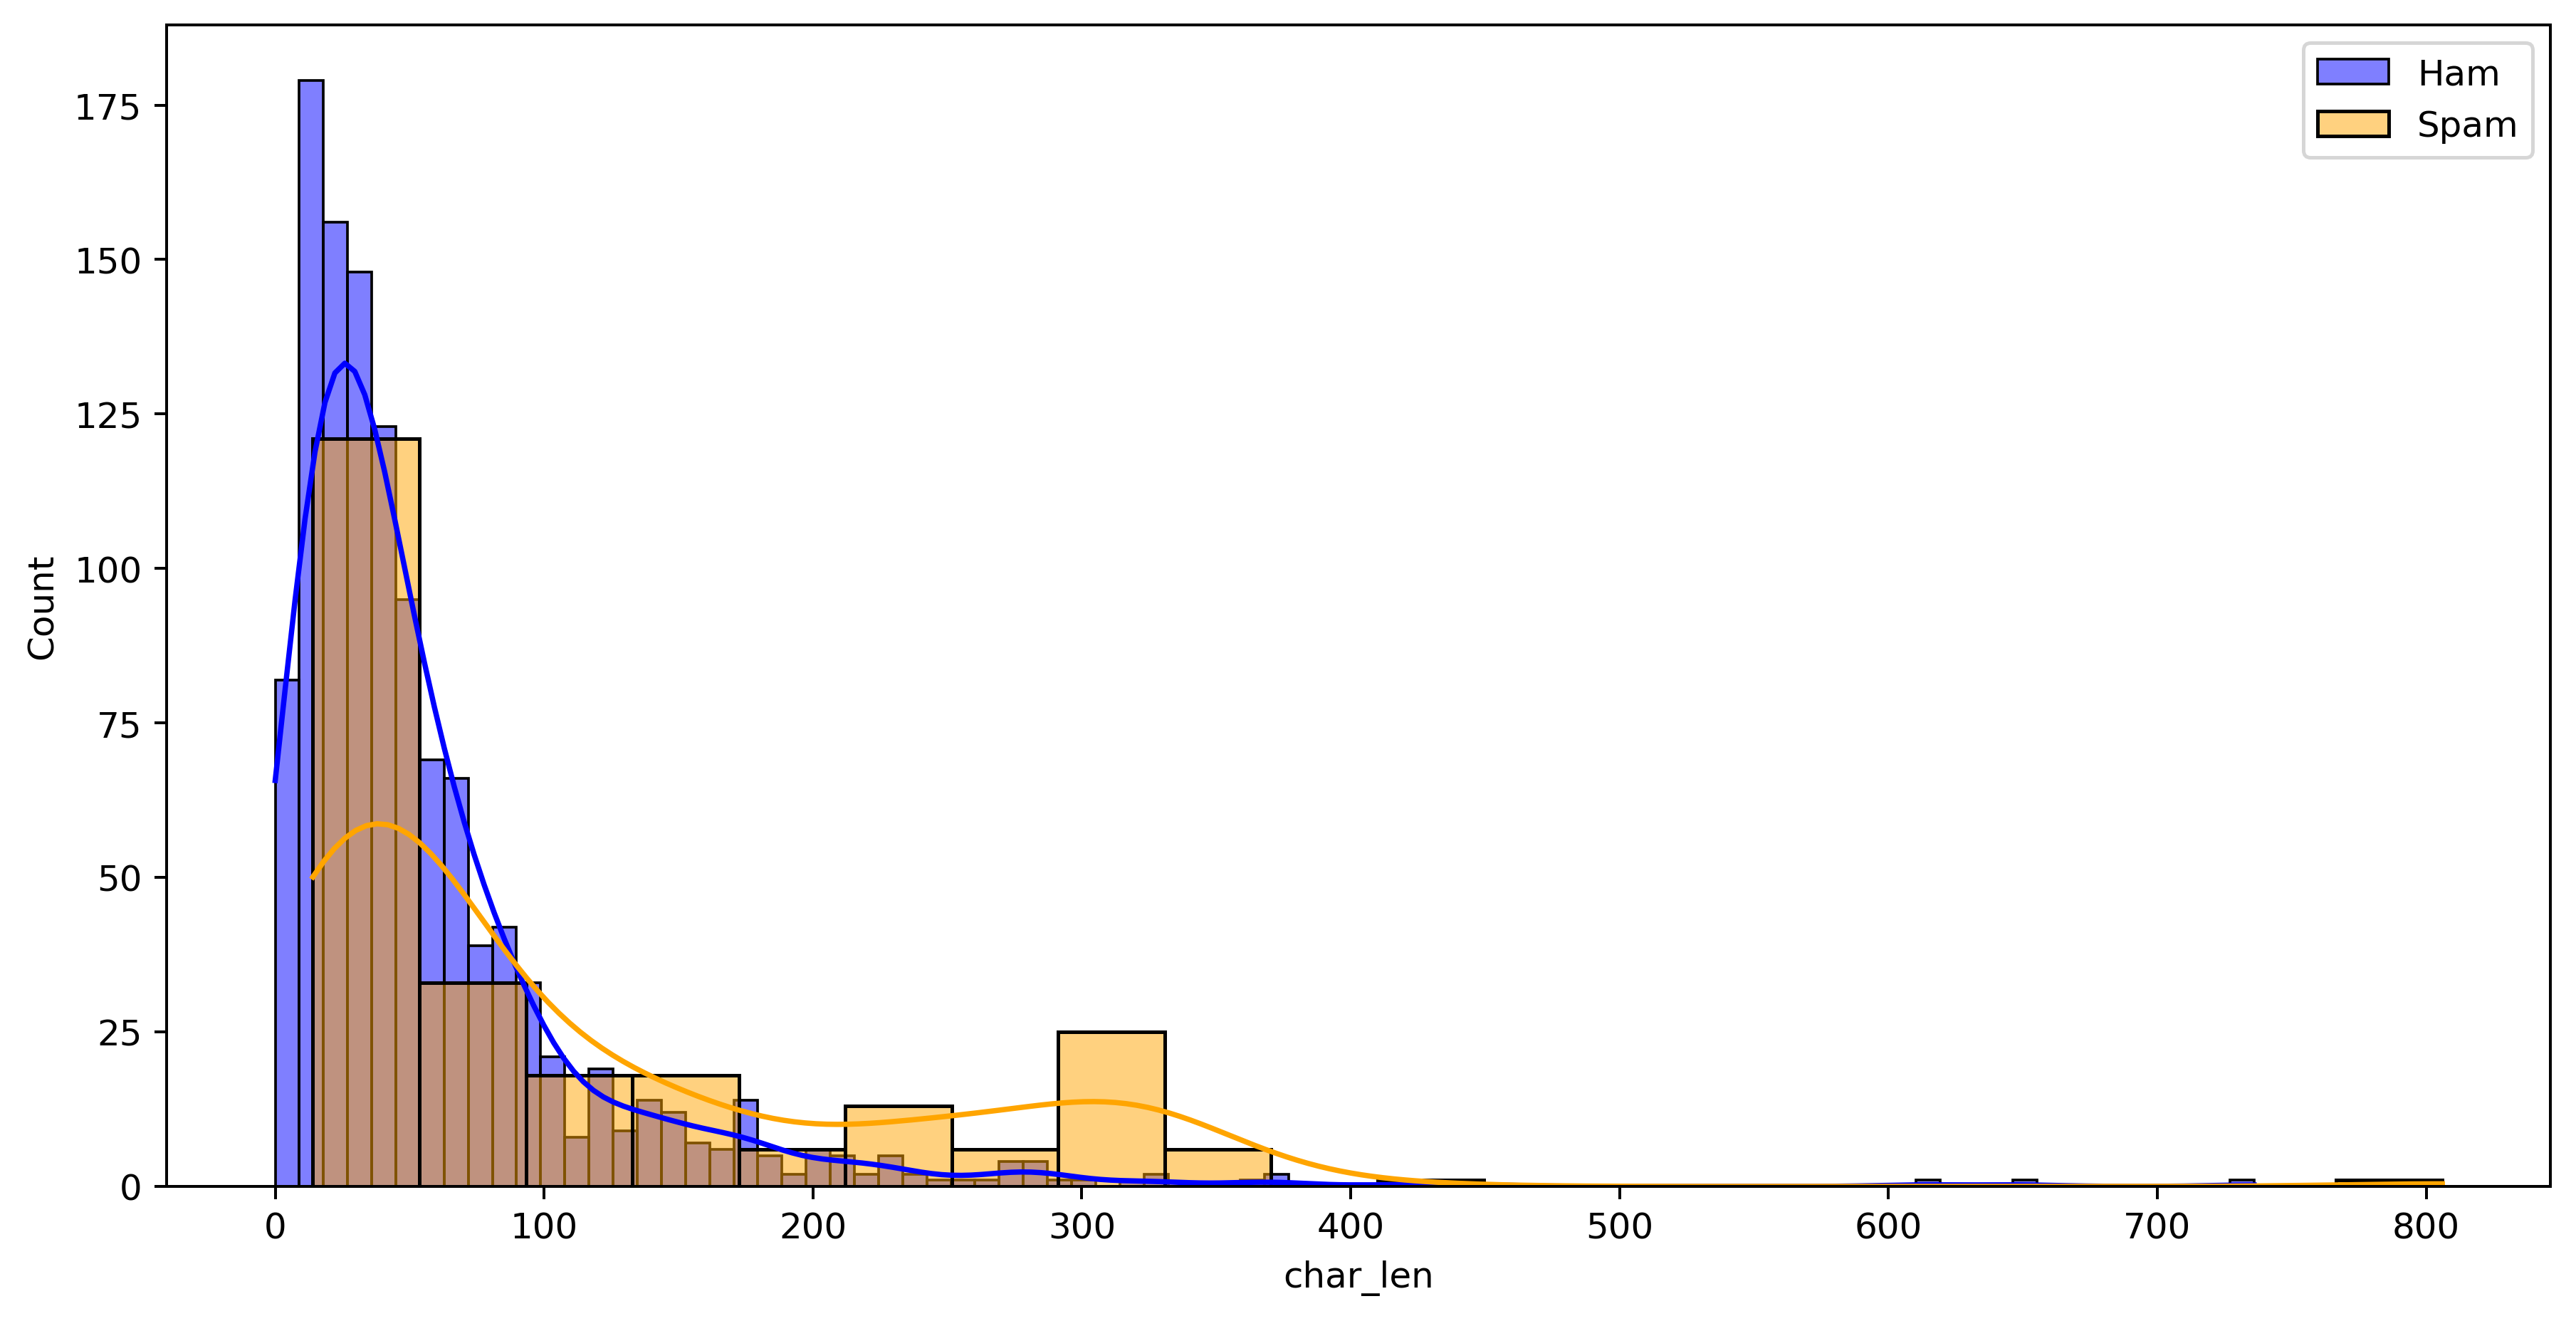

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams["figure.dpi"] = 360
sns.histplot(data= data[data['Labels']==0], x="char_len", color="blue", label="Ham", kde=True)
sns.histplot(data= data[data['Labels']==1], x="char_len", color="orange", label="Spam", kde=True)
plt.legend() 
plt.show()

<Figure size 4320x2160 with 0 Axes>

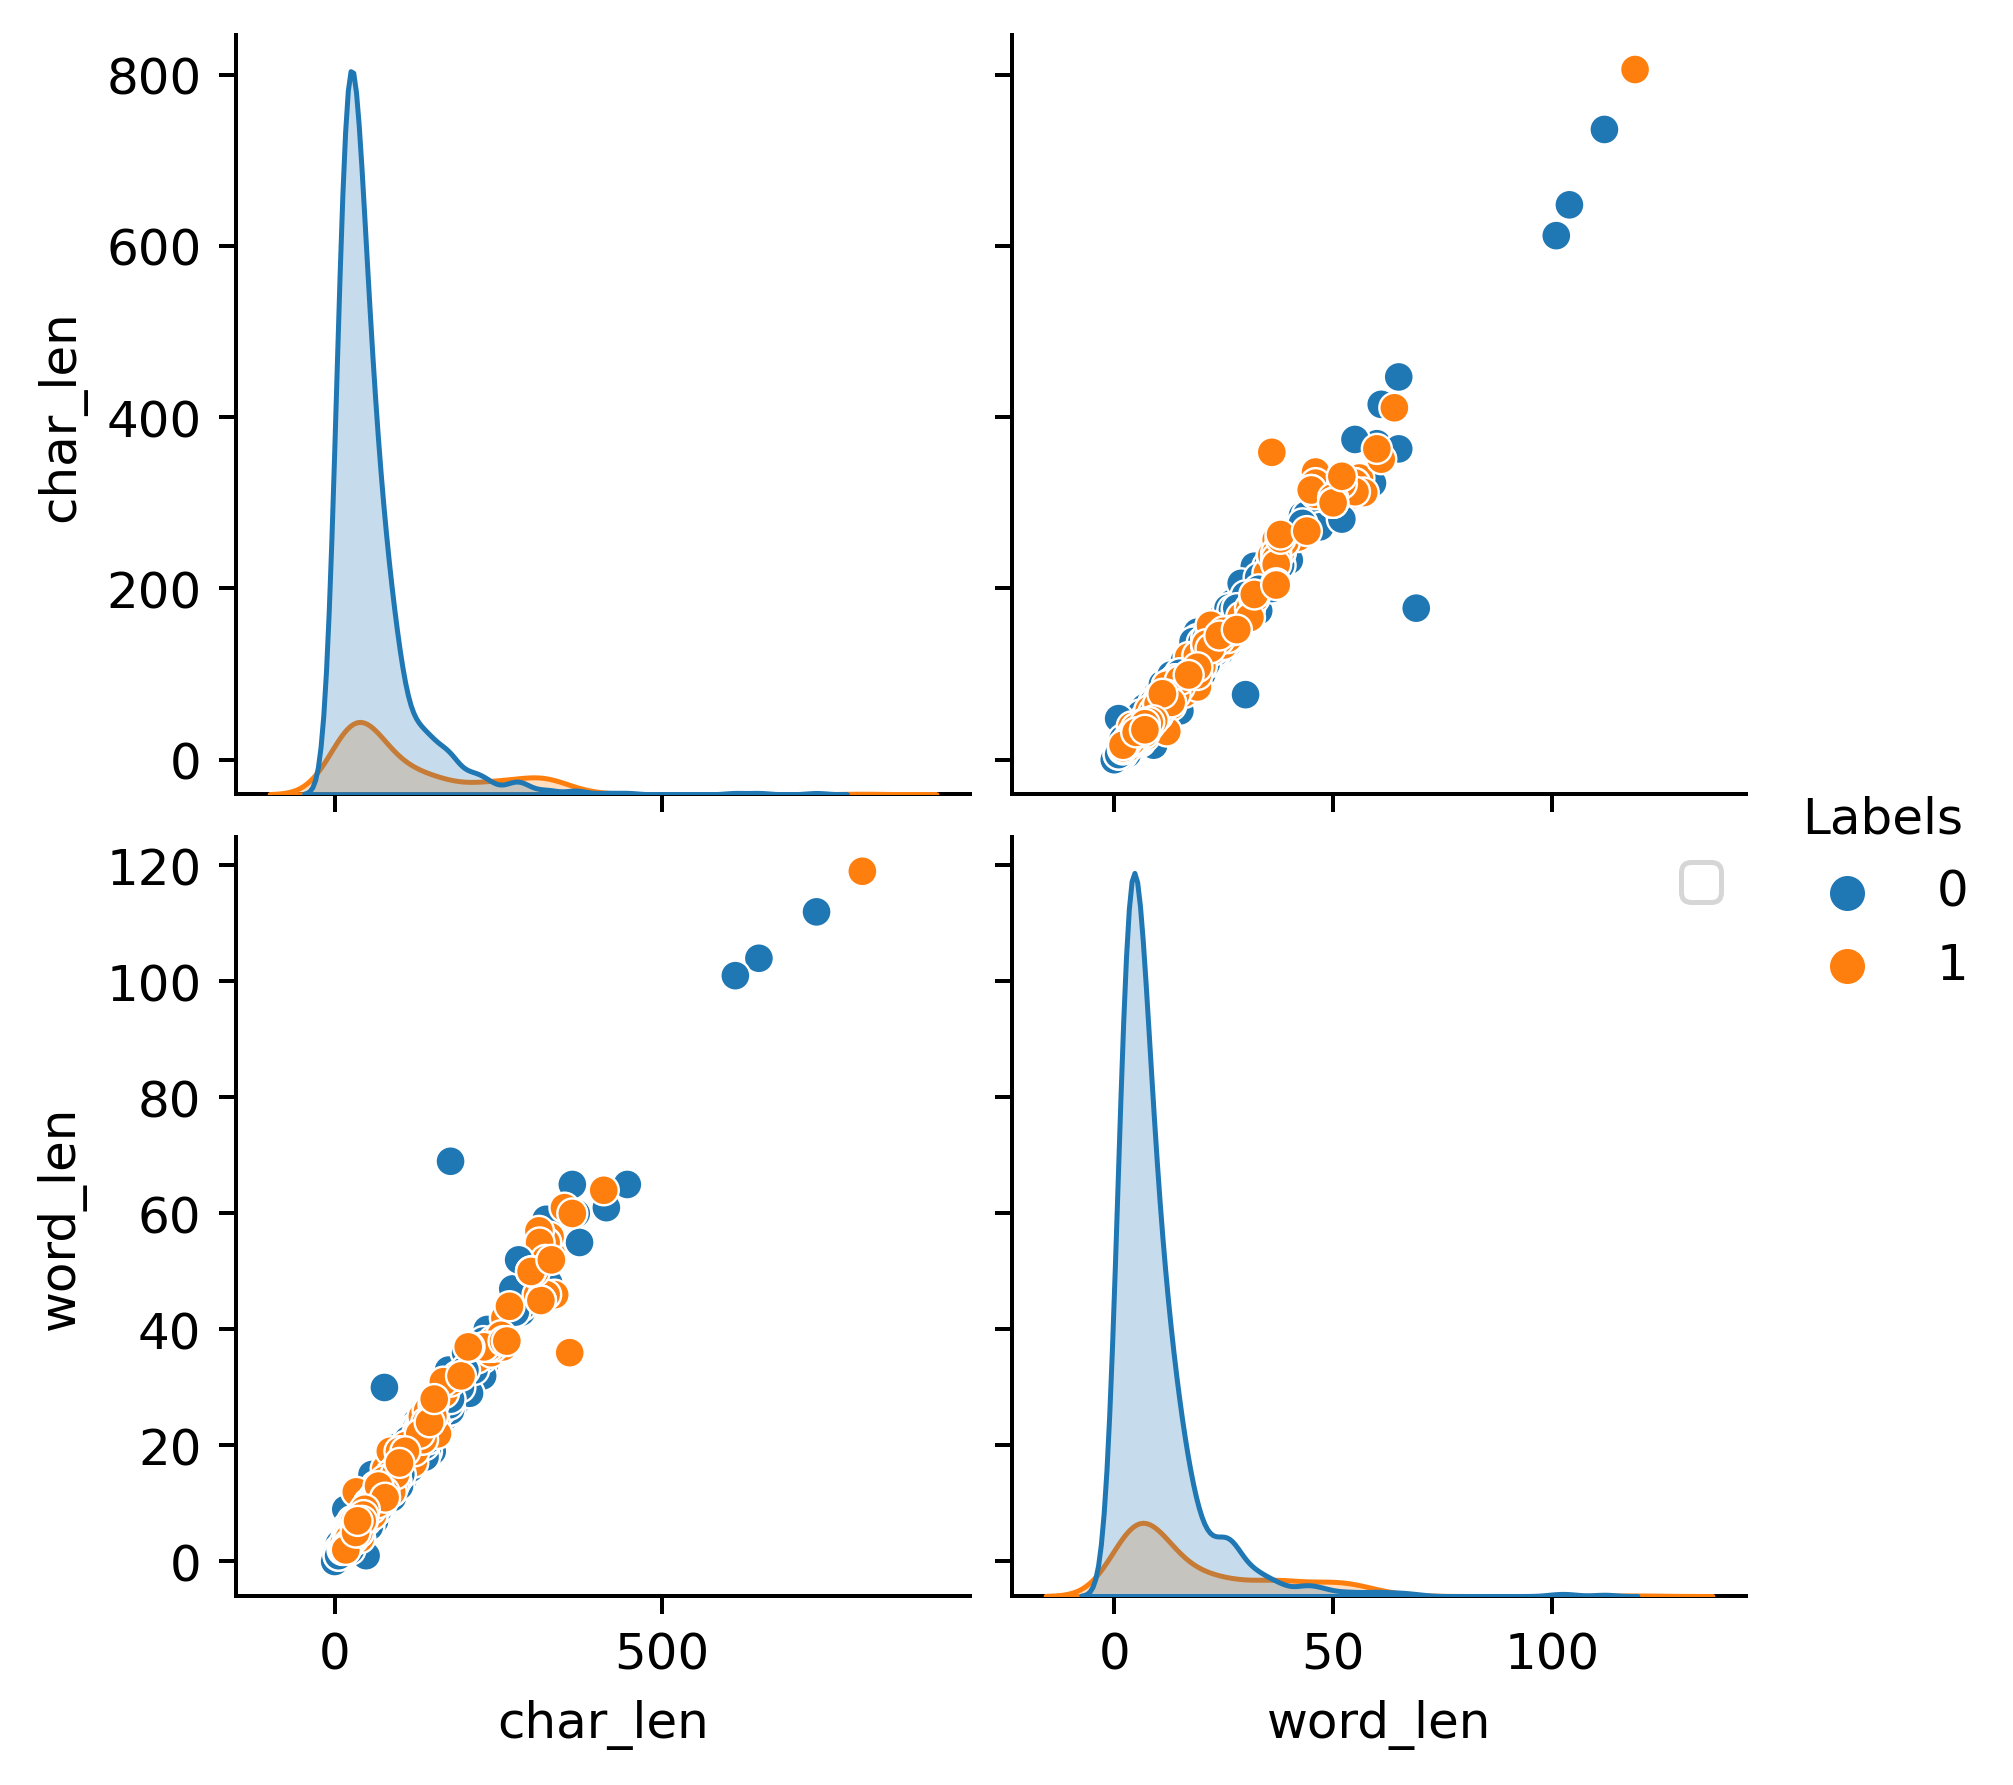

In [ ]:
plt.figure(figsize=(12,6))
plt.rcParams["figure.dpi"] = 360
sns.pairplot(data, hue ='Labels')
plt.legend() 
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


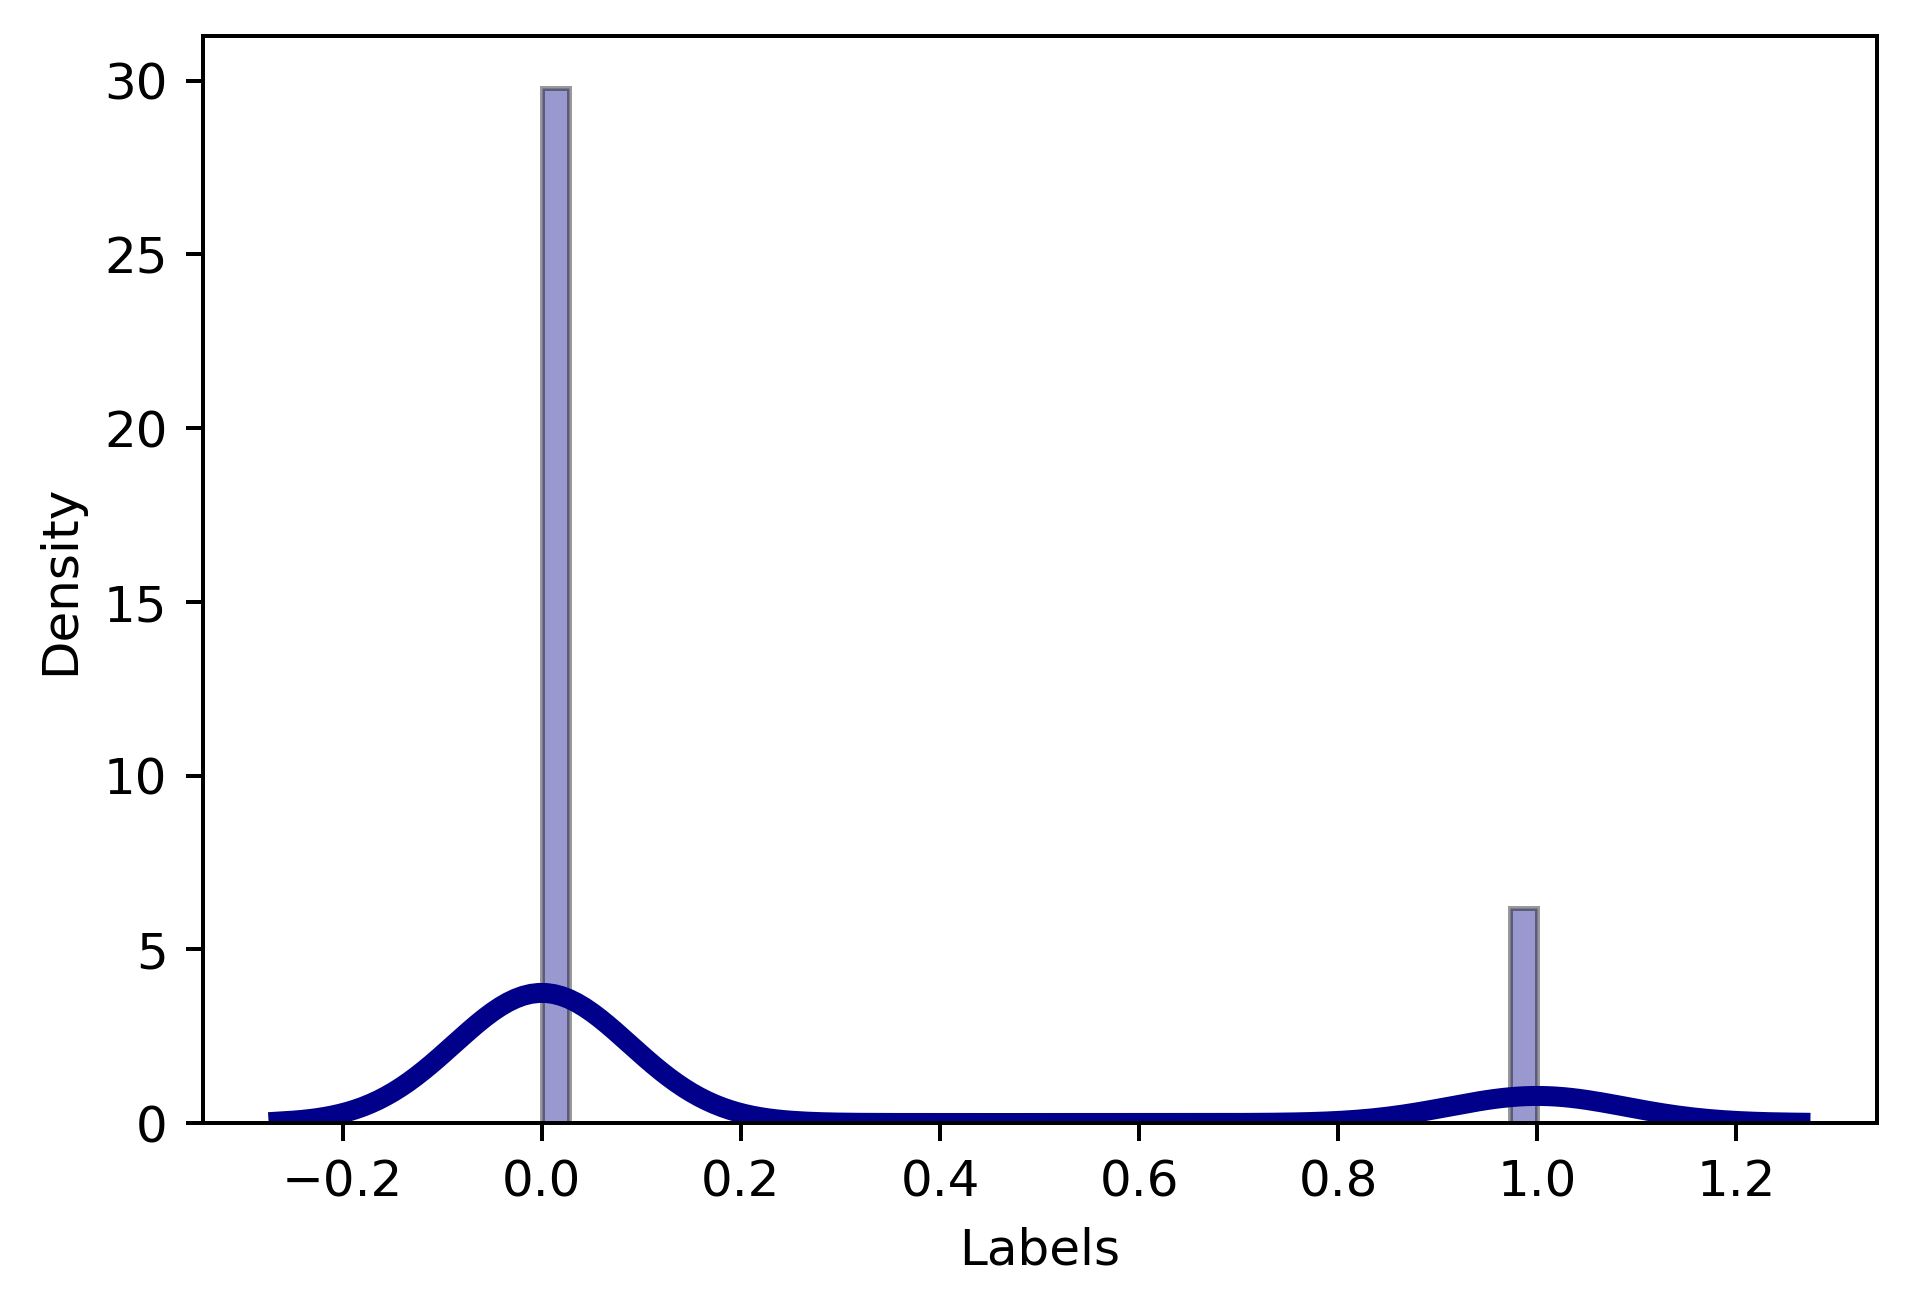

In [ ]:
sns.distplot(data['Labels'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

In [ ]:
spam_comment = data[data["Labels"]==1]
spam_comment

,Comment,char_len,word_len,Labels
108,somehow found maya passed fucking christmas pr...,260,42,1
179,love pewds ad channel,21,4,1
222,never easy getting someone loved near dear hea...,173,27,1
348,pdp grandma nordvpn check computer right ill w...,86,14,1
359,son grew watching channel want thank sharing m...,51,9,1
...,...,...,...,...
1436,know sean kingston got famous 39 look kid hard...,99,17,1
1437,check eminem latest track survival u didnt,42,7,1
1438,subscribe channel x please spare,32,5,1
1439,check video guy hope guy good laugh,35,7,1


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re, string, unicodedata
import nltk
from collections import Counter

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report

# SMOTE
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
data.head()

,Comment,char_len,word_len,Labels
0,believe pewds brave enough post prison,38,6,0
1,thanks thinking u felix appreciate uploads lon...,81,12,0
2,imagine asking proudly say burnt goat,37,6,0
3,dont think ive ever experienced youtube video ...,180,26,0
4,started 1966 also pewds believe going 80 year,45,8,0


In [ ]:
data['Labels'].value_counts()

0    1193
1     248
Name: Labels, dtype: int64

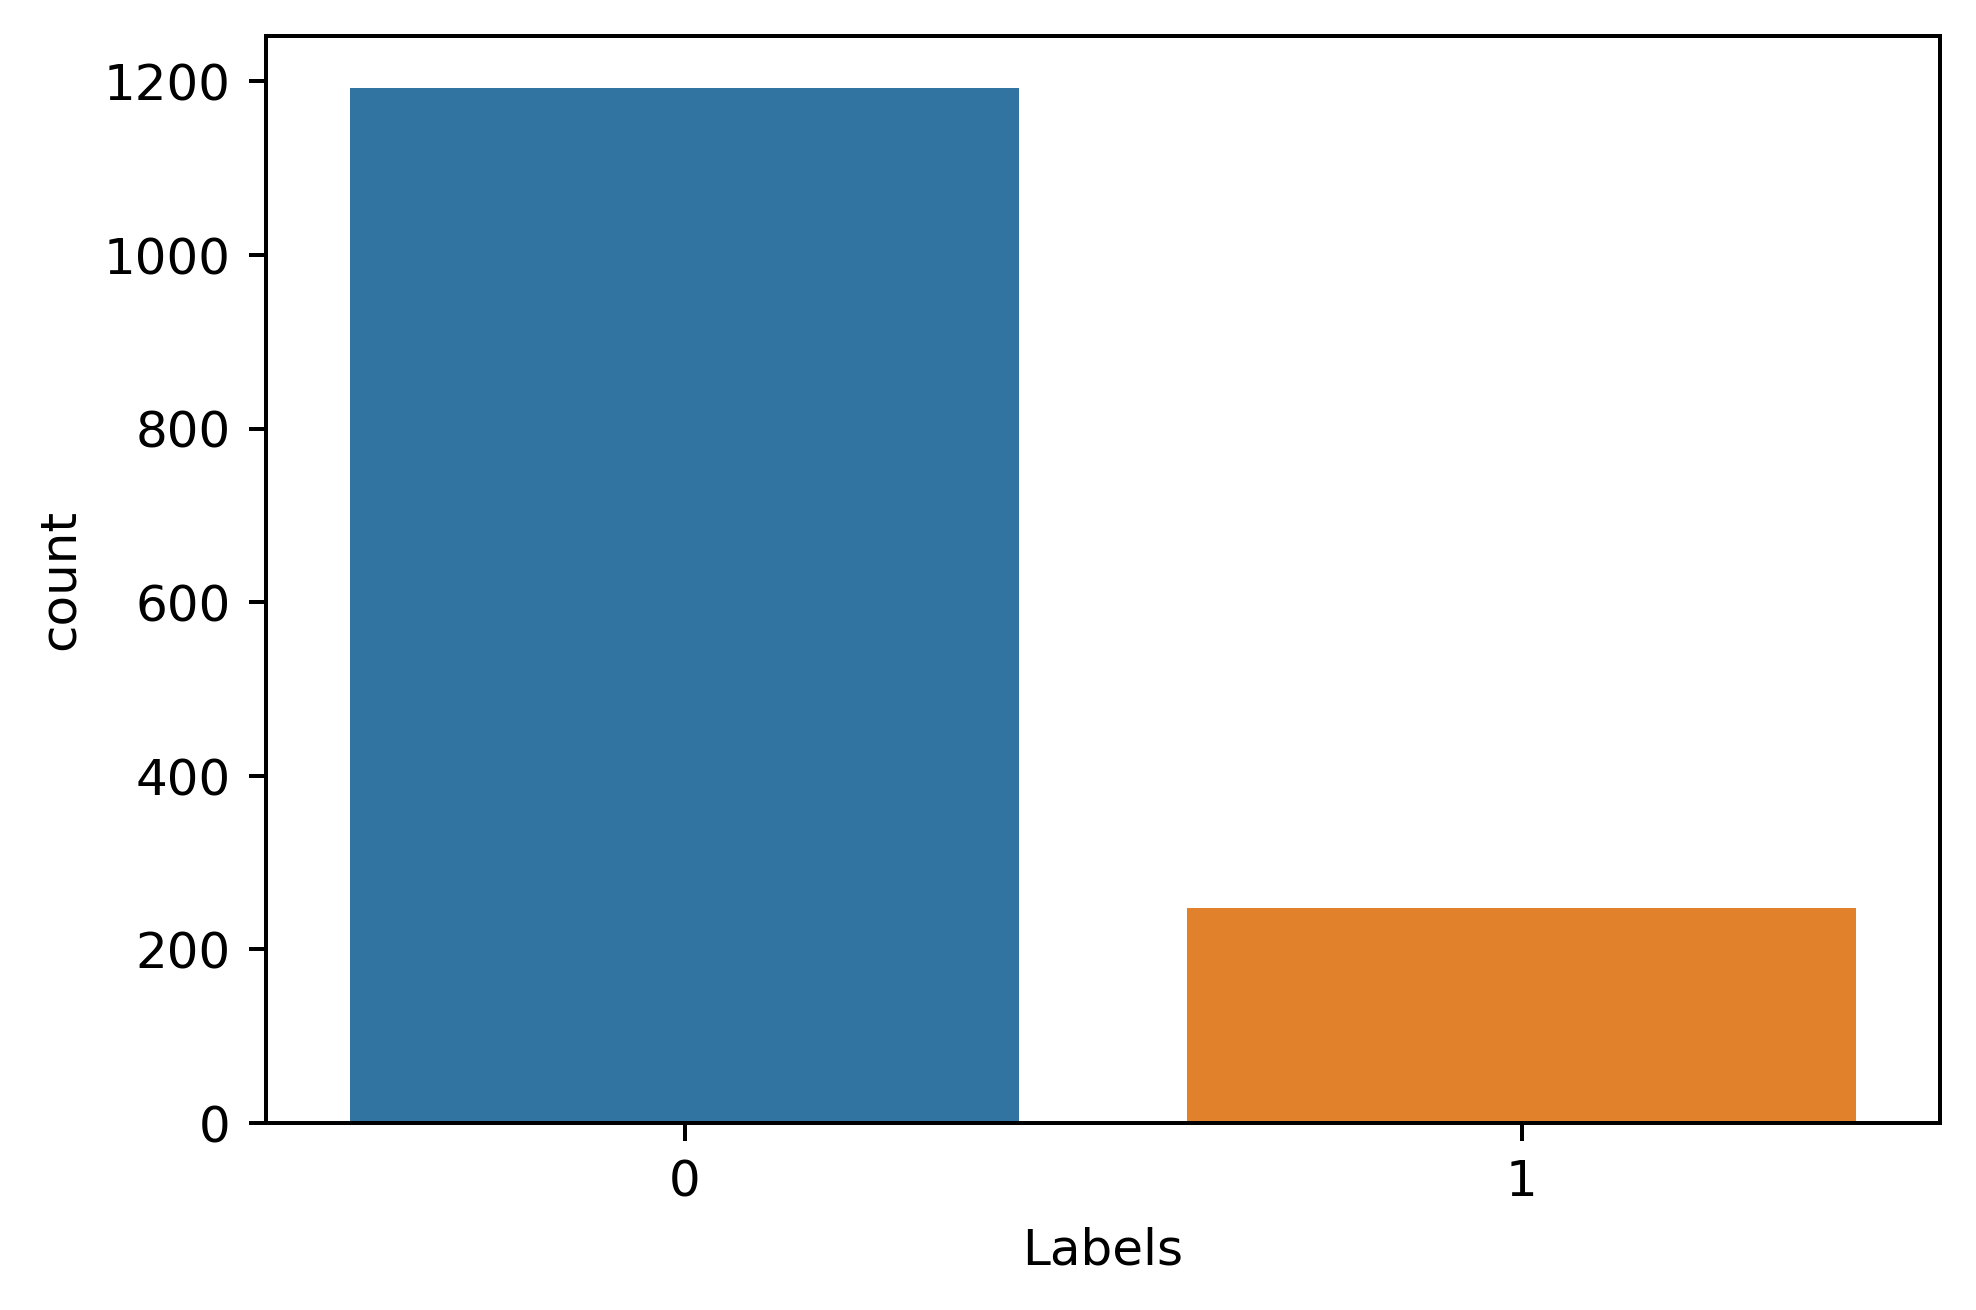

In [ ]:
sns.countplot(x = "Labels", data = data)
plt.rcParams["figure.dpi"] = 360

In [ ]:
ham = data[data['Labels'] == 0]
ham_count = ham['Comment'].str.split().str.len()
ham_count.index = ham_count.index.astype(str) + ' words:'
ham_count.sort_index(inplace=True)

In [ ]:
spam = data[data['Labels'] == 1]
spam_count = spam['Comment'].str.split().str.len()
spam_count.index = spam_count.index.astype(str) + ' words:'
spam_count.sort_index(inplace=True)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


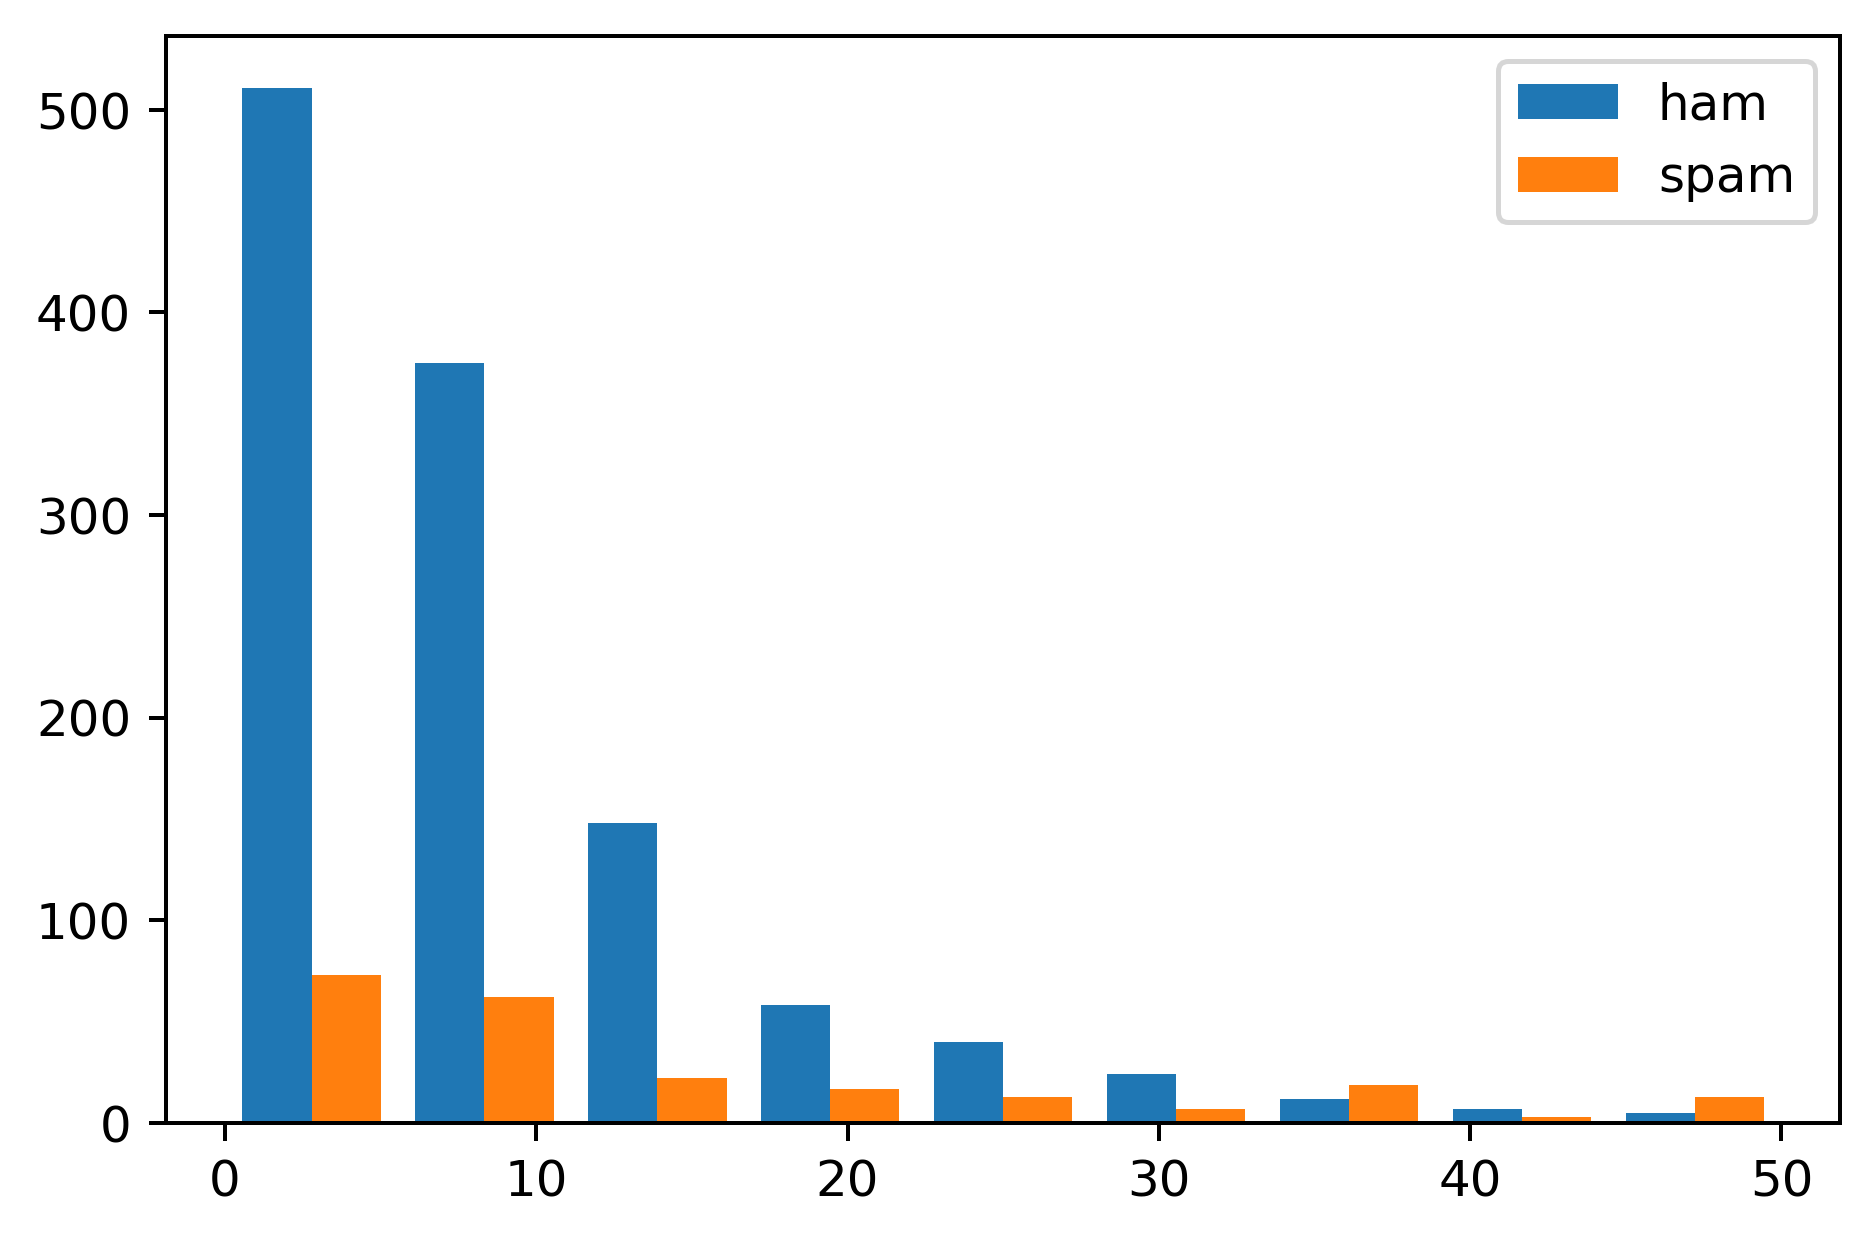

In [ ]:
bins = np.linspace(0, 50, 10)
plt.rcParams["figure.dpi"] = 360
plt.hist([ham_count, spam_count], bins, label=['ham', 'spam'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
char_len_check = data.iloc[:, 1].values

1
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
{'_stale': True, 'stale_callback': <function _stale_axes_callback at 0x7fa2095d6ee0>, '_axes': <matplotlib.axes._axes.Axes object at 0x7fa1184ea430>, 'figure': <Figure size 3600x2520 with 1 Axes>, '_transform': <matplotlib.transforms.CompositeGenericTransform object at 0x7fa1184ea5e0>, '_transformSet': True, '_visible': True, '_animated': False, '_alpha': None, 'clipbox': <matplotlib.transforms.TransformedBbox object at 0x7fa1183d9d30>, '_clippath': None, '_clipon': True, '_label': '', '_picker': None, '_contains': None, '_rasterized': None, '_agg_filter': None, '_mouseover': False, 'eventson': False, '_oid': 0, '_propobservers': {}, '_remove_method': <built-in method remove of list object at 0x7fa1184c5240>, '_url': None, '_gid': None, '_snap': None, '_sketch': None, '_path_effects': [], '_sticky_edges': _XYPair(x=[], y=[]), '_in_layout': True, '_hatch_color': (0.0, 0.0, 0.0, 1.0), '_fill': True, '_original_edgec

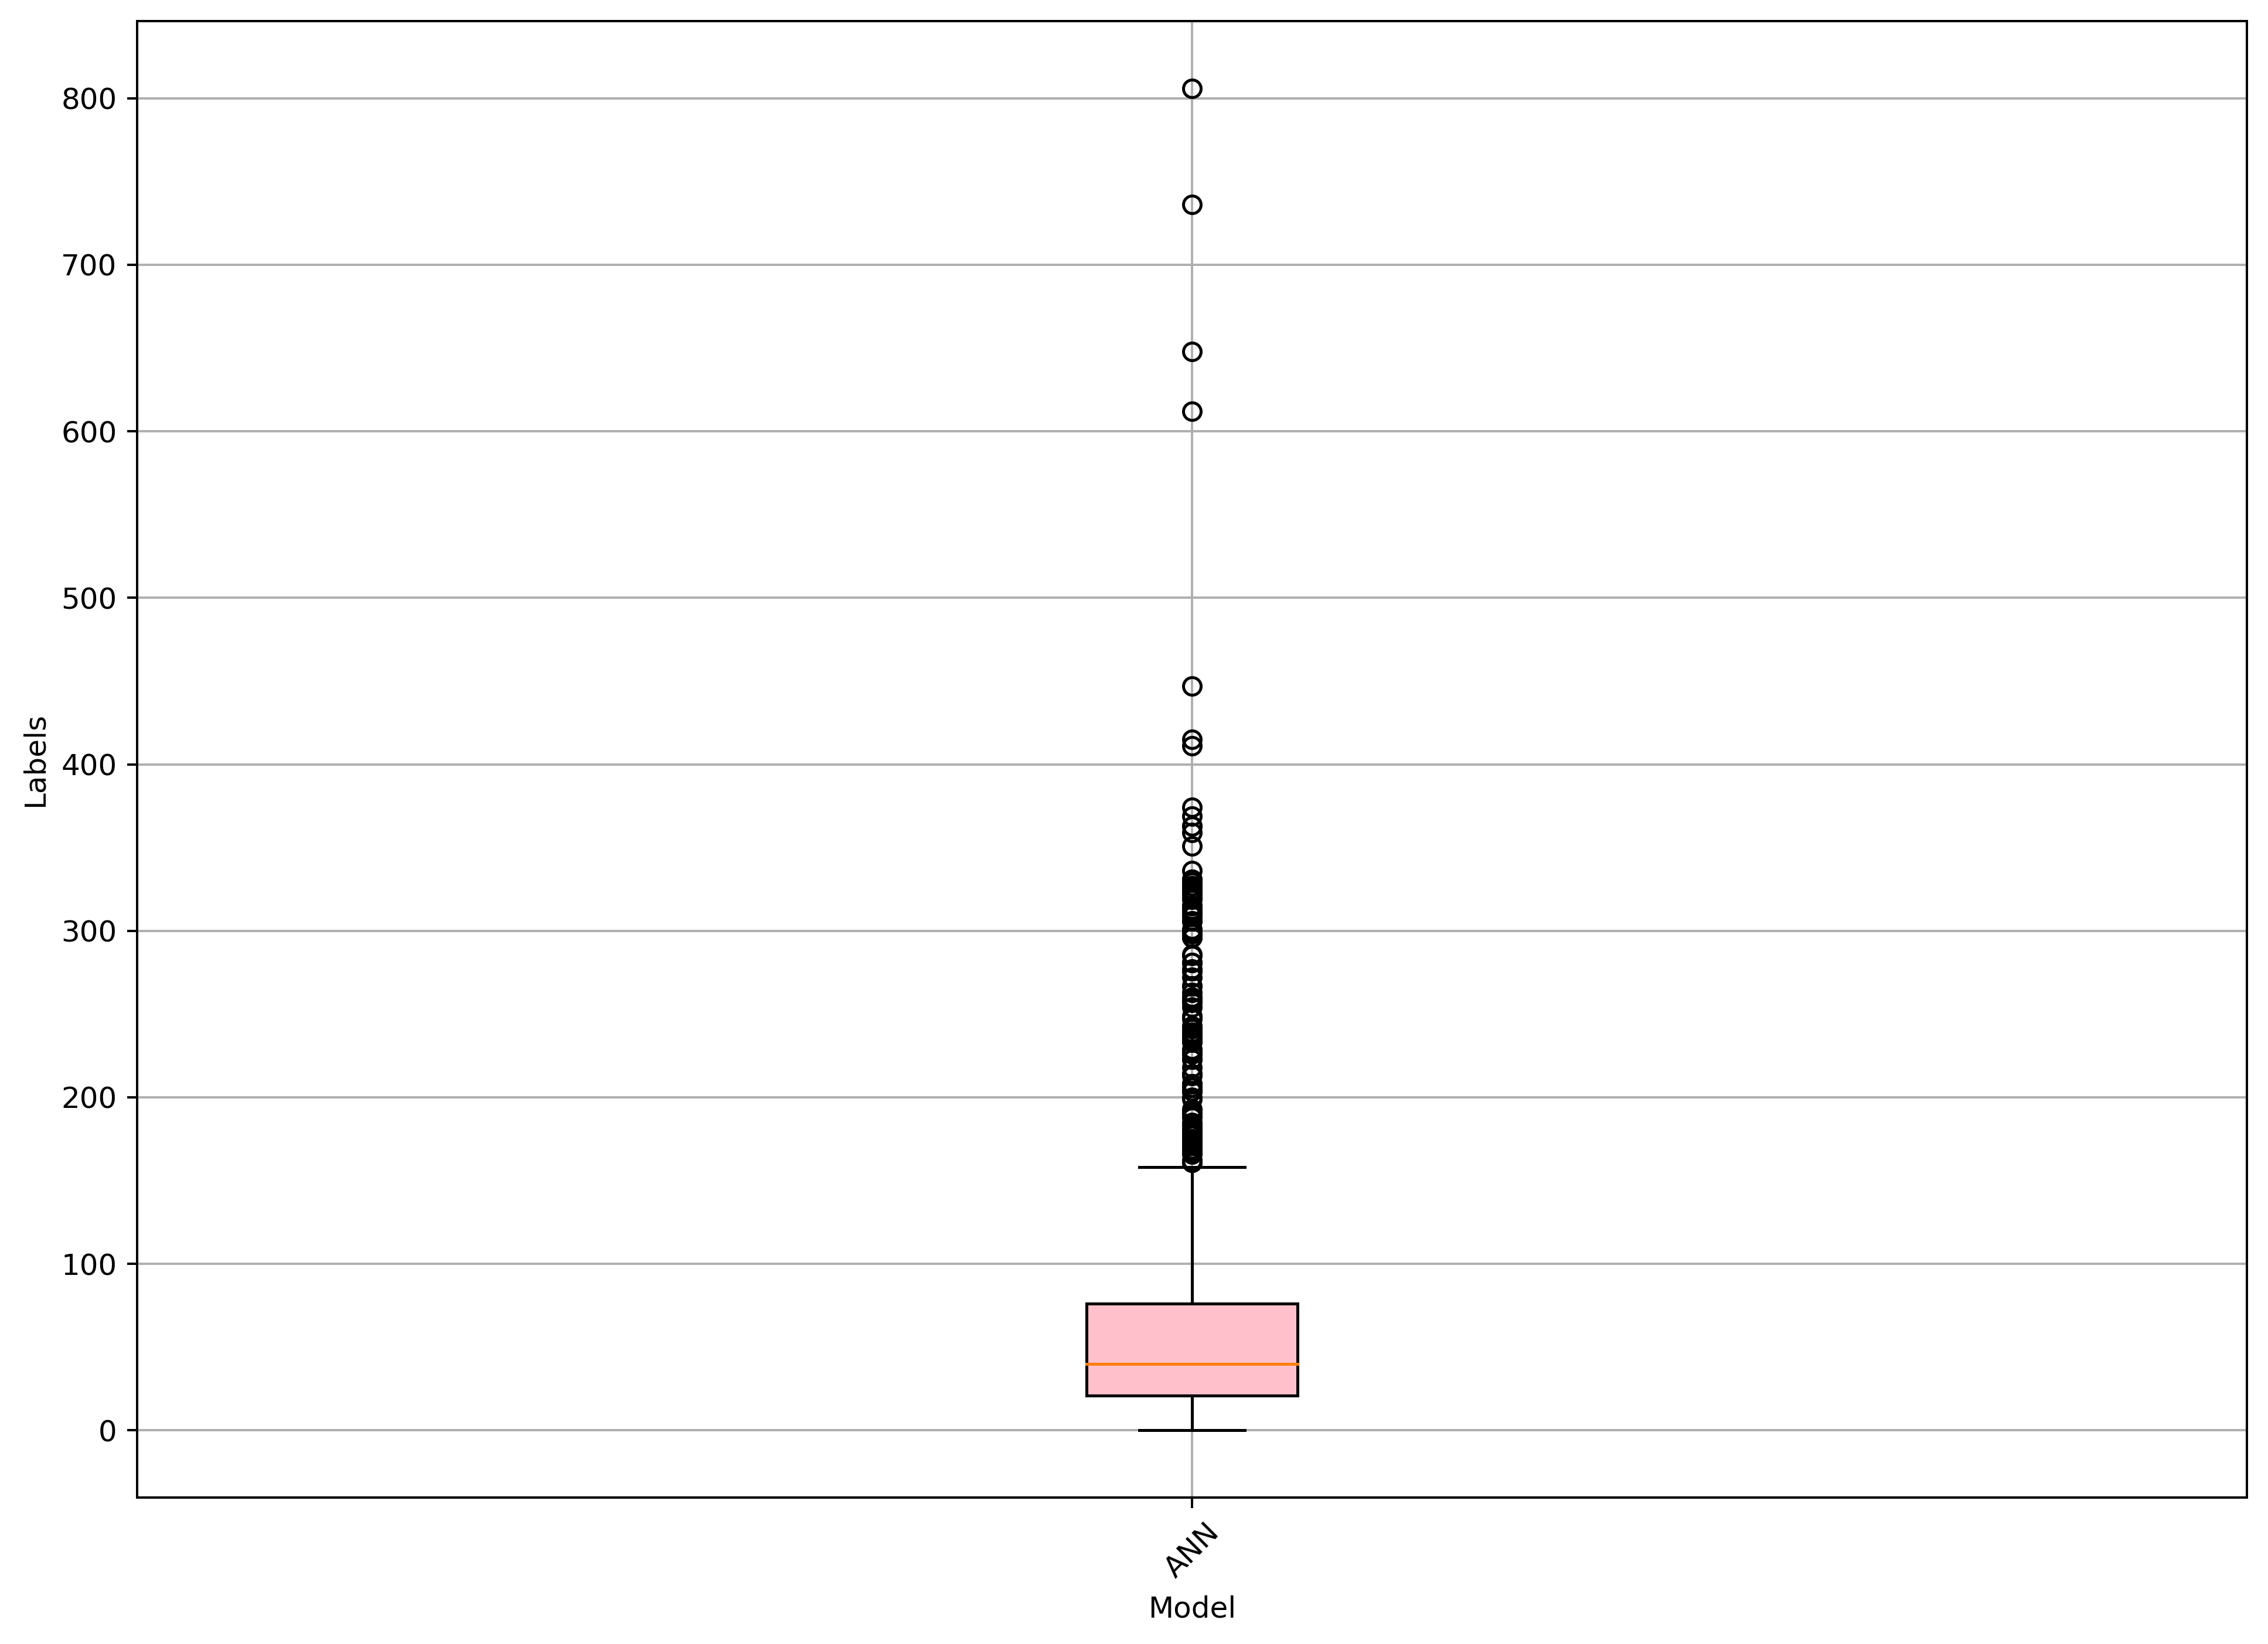

In [ ]:
plt.style.use('default')

# plt.style.use('ggplot')

plt.rcParams["figure.dpi"] = 360

#print(len(accss_transpose_selected))

#x = np.arange(len(accss_transpose_selected))

Method = [
    # 'LR', 
    # 'SVR', 
    # 'KNNR', 
    # 'DTR', 
    # 'GBR', 
    # 'RFR', 
    # 'ABR', 
    # 'LLR', 
    # 'XBR', 
    # 'NR',
    'ANN'
          ]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

x_axis = np.arange(1,len(Method)+1)

width = 0.1
 
# Creating plot
bpA = ax.boxplot(char_len_check, widths=width, patch_artist=True, positions=x_axis)
plt.xticks(x_axis, Method, rotation = 45)

boxes = bpA['boxes']

print(len(boxes))

patch = boxes[0]

print(bpA.keys())
print(patch.__dict__)
print(dir(patch))

# fill with colors
colors = [
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # # 'pink', 
    'pink', 
    ]

for patch, color in zip(boxes, colors):
    patch.set_facecolor(color)

#ax.set_title('KNN Accuracy by Data Size and Undersampling Method', size=24)
#ax.set_ylabel('Score', size=24)
#ax.set_xlabel('Model(Data Size) + Undersampling Method', size=24)
#ax.set_xticks(x+1, range(min,(min*n)+1,min))
# ax.scatter(x_axis-width, y, color="pink", label="CV = 2")
# ax.legend()
ax.set_xlabel("Model")
ax.set_ylabel("Labels")
plt.grid()
plt.show()

### Pre-Processing

In [ ]:
len(data)

1441

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(data["Comment"]).toarray()
# X = data["Comment"].values  
X = data.iloc[:, 0].values
y = data.iloc[:, -1].values
# y = data['Labels'].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comment   1441 non-null   object
 1   char_len  1441 non-null   int64 
 2   word_len  1441 non-null   int64 
 3   Labels    1441 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.2+ KB


In [ ]:
X = X.reshape(-1,1)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

### Balancing Data

In [ ]:
# Handle imbalance class using oversampling minority class with SMOTE method
# os = SMOTE(sampling_strategy='minority',random_state = 1,k_neighbors=5)
# X_train,y_train = os.fit_resample(X,y)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
# oversampling
X_over, y_over = over.fit_resample(X, y)
print(f"Oversampled: {Counter(y_over)}")
# undersampling 
X_ou, y_ou = under.fit_resample(X_over, y_over)
print(f"Combined Random Sampling: {Counter(y_ou)}")

Oversampled: Counter({0: 1193, 1: 596})
Combined Random Sampling: Counter({0: 745, 1: 596})


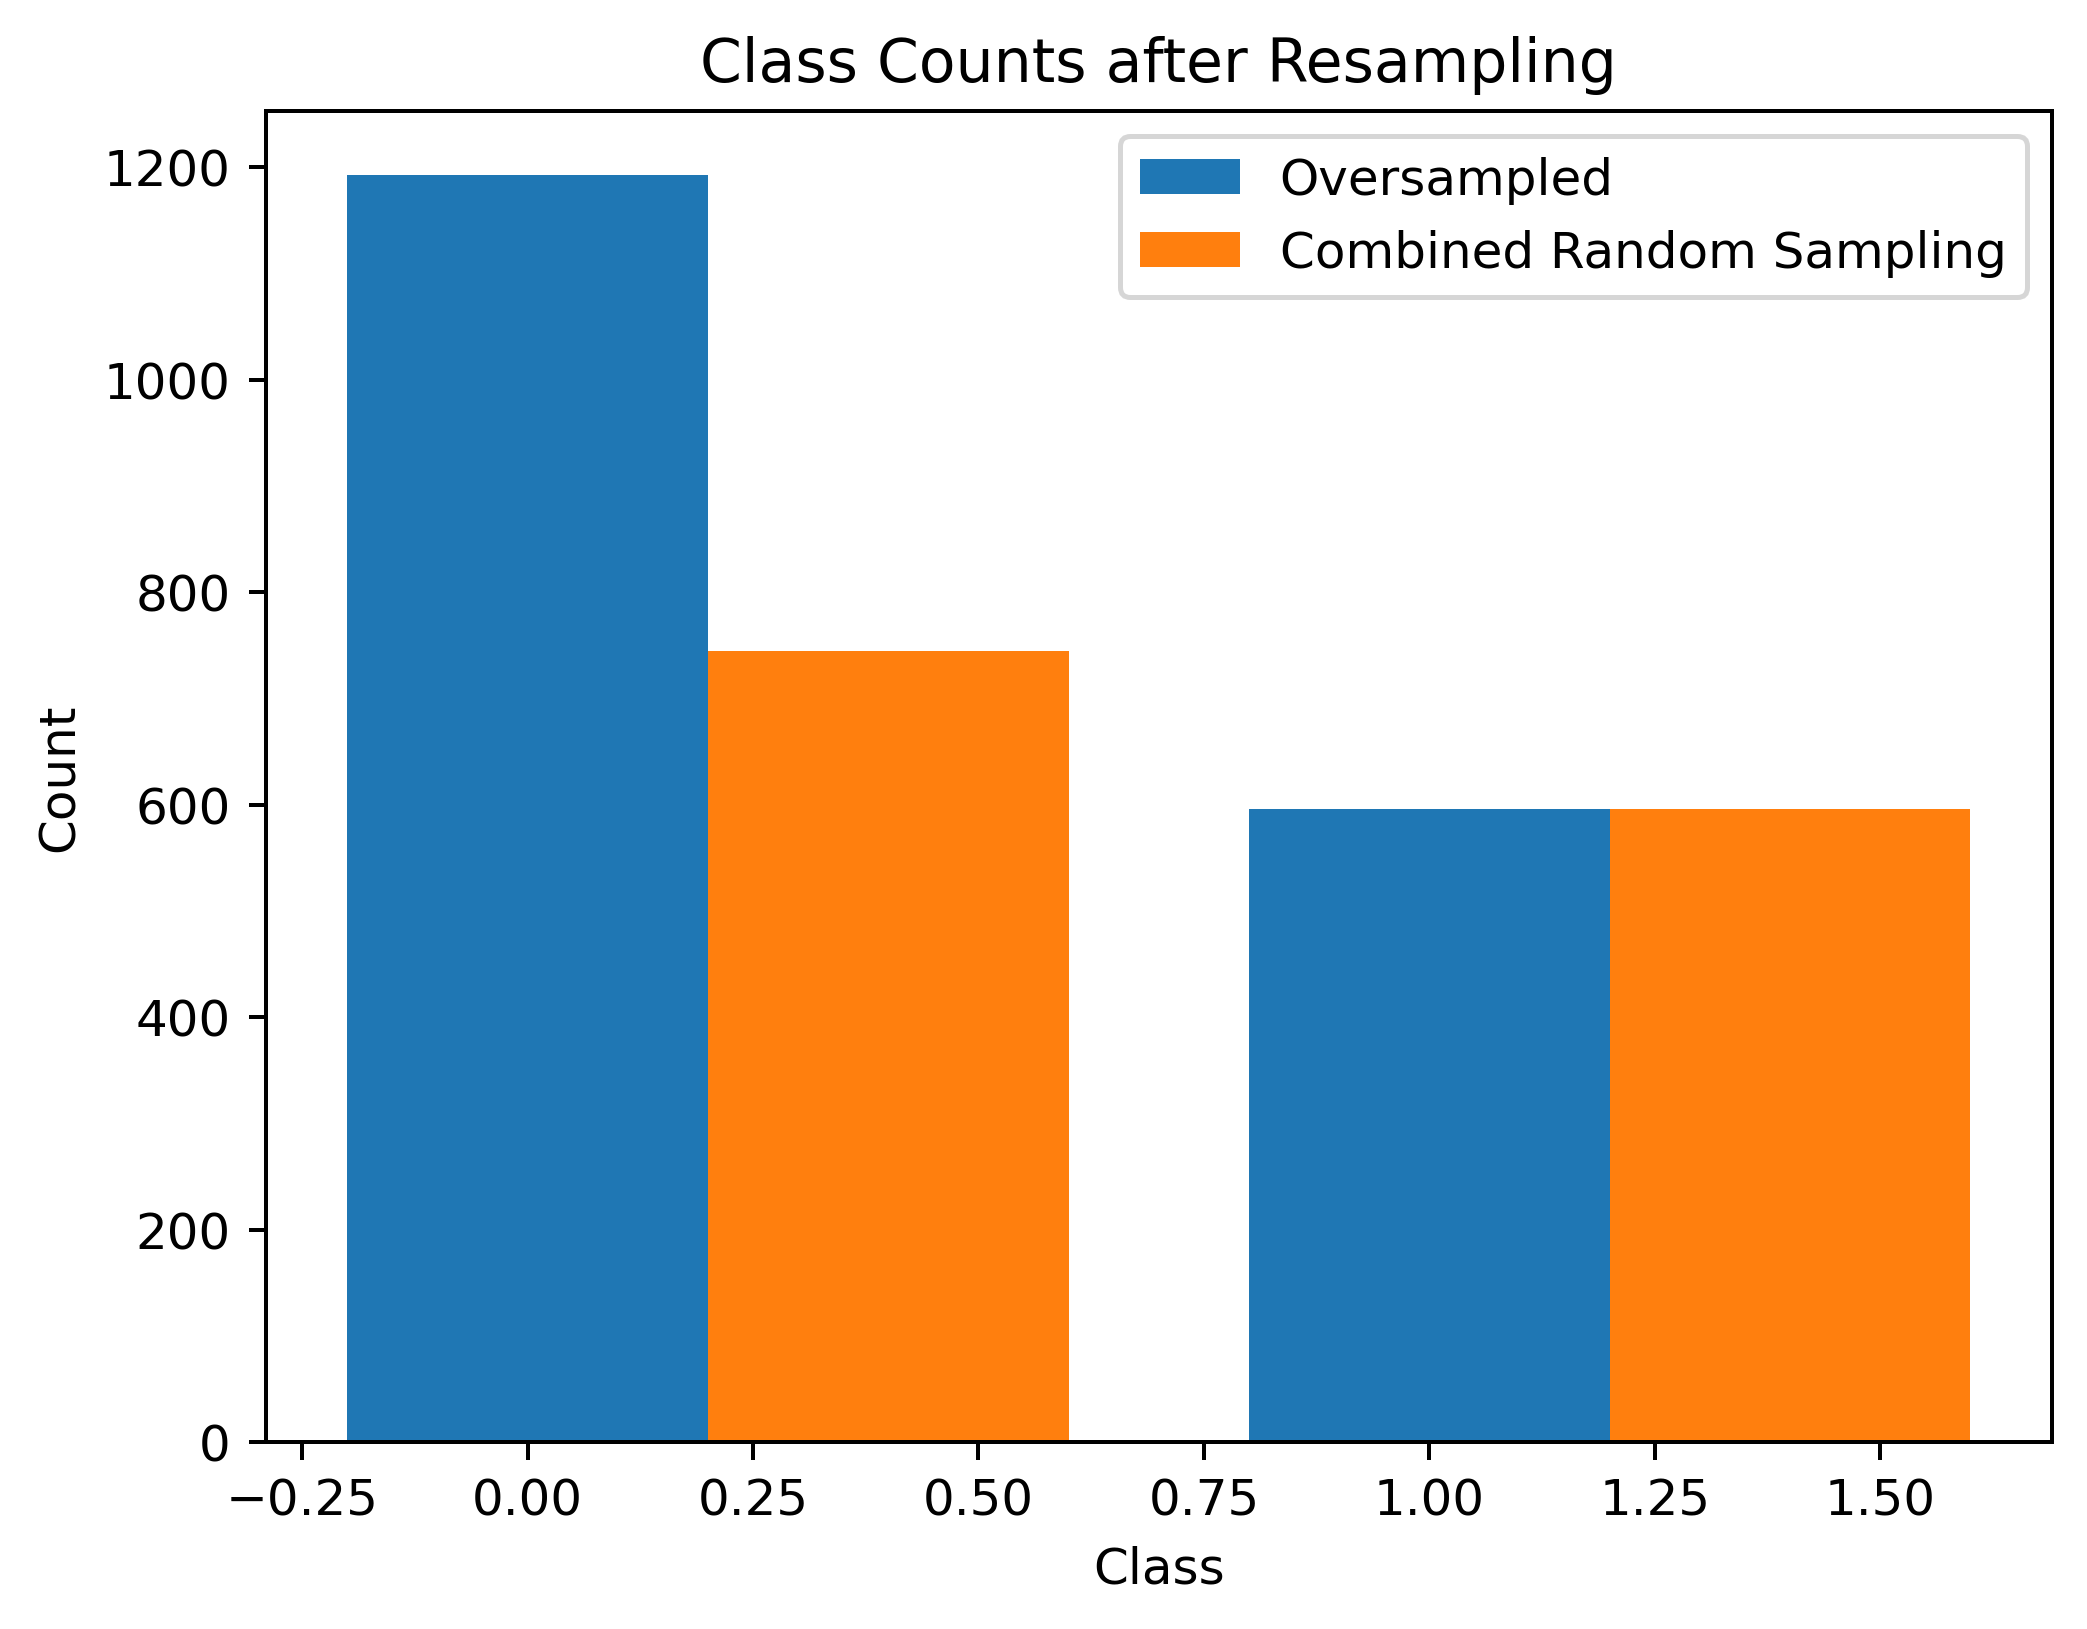

In [ ]:
# Calculate class counts
over_counts = Counter(y_over)
ou_counts = Counter(y_ou)

# Set the width of the bars
bar_width = 0.4

# Set the positions of the bars
bar_positions = np.arange(len(over_counts))

# Create the bars
plt.bar(bar_positions, over_counts.values(), width=bar_width, label="Oversampled")
plt.bar(bar_positions + bar_width, ou_counts.values(), width=bar_width, label="Combined Random Sampling")
plt.rcParams["figure.dpi"] = 360
# Add labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Counts after Resampling")

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Split train and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ou, y_ou, test_size=0.5, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train.ravel())
X_train=vectorizer.transform(X_train.ravel())
X_test=vectorizer.transform(X_test.ravel())
X_train=X_train.toarray()
X_test=X_test.toarray()

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Model

In [ ]:
length = X_train.shape[1]

model = Sequential()
model.add(Dense(100,input_shape=(length,) , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               213300    
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 223,989
Trainable params: 223,989
Non-trai

In [ ]:
earlystopping = callbacks.EarlyStopping(monitor='val_loss',
                                        mode='min',
                                        verbose=1,
                                        patience=5)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=9,batch_size=128,callbacks =[earlystopping])

Epoch 1/9
6/6 [==============================] - 4s 148ms/step - loss: 0.6896 - accuracy: 0.4731 - val_loss: 0.6717 - val_accuracy: 0.6140
Epoch 2/9
6/6 [==============================] - 0s 53ms/step - loss: 0.6568 - accuracy: 0.6194 - val_loss: 0.6462 - val_accuracy: 0.7750
Epoch 3/9
6/6 [==============================] - 0s 51ms/step - loss: 0.6289 - accuracy: 0.7060 - val_loss: 0.6100 - val_accuracy: 0.8420
Epoch 4/9
6/6 [==============================] - 0s 52ms/step - loss: 0.5876 - accuracy: 0.8179 - val_loss: 0.5620 - val_accuracy: 0.8733
Epoch 5/9
6/6 [==============================] - 0s 46ms/step - loss: 0.5291 - accuracy: 0.8881 - val_loss: 0.5056 - val_accuracy: 0.9046
Epoch 6/9
6/6 [==============================] - 0s 45ms/step - loss: 0.4607 - accuracy: 0.9433 - val_loss: 0.4376 - val_accuracy: 0.9210
Epoch 7/9
6/6 [==============================] - 0s 33ms/step - loss: 0.3826 - accuracy: 0.9746 - val_loss: 0.3587 - val_accuracy: 0.9359
Epoch 8/9
6/6 [==================

In [ ]:
input_string = "Owww, i just won $1000 on this website https://wheelofmoney.com, click it and go win some too "
# Visit this link to win free money https://free-money.xyz
#Owww, i just won $1000 on this website https://wheelofmoney.com, click it and go win some too

input_string = preprocessing(input_string)

print(input_string)
input_string = cv.transform([input_string]).toarray()
input_string = input_string[:, :2132]

prediction = model.predict([input_string])
print(prediction)

if prediction > 0.5:
    print("The input string is likely to be spam.")
else:
    print("The input string is likely to be not spam.")

owww 1000 website http wheelofmoney com click go win
1/1 [==============================] - 0s 239ms/step
[[0.6942765]]
The input string is likely to be spam.


In [ ]:
from keras.models import model_from_json

# save the model architecture to JSON file
json_string = model.to_json()
with open('model_architecture.json', 'w') as f:
    f.write(json_string)

# save the model weights to HDF5 file
model.save_weights('model_weights.h5')

In [ ]:
with open('model_architecture.json', 'r') as f:
    json_string = f.read()
loaded_model = model_from_json(json_string)

# load the model weights from HDF5 file
loaded_model.load_weights('model_weights.h5')

In [ ]:
# test the loaded model on new data
# test_data = pd.read_csv('pewds_ytb_comment.csv',encoding="ISO-8859-1") # your test data
test_data = "Visit this link to win free money https://free-money.xyz"

# 

test_data = preprocessing(test_data)

print(test_data)
test_data = cv.transform([test_data]).toarray()
test_data = test_data[:, :2132]
predictions = loaded_model.predict(test_data)
print(predictions)
# predictions = loaded_model.predict_classes(test_data)

visit link win free money http free money xyz
1/1 [==============================] - 0s 240ms/step
[[0.53378665]]


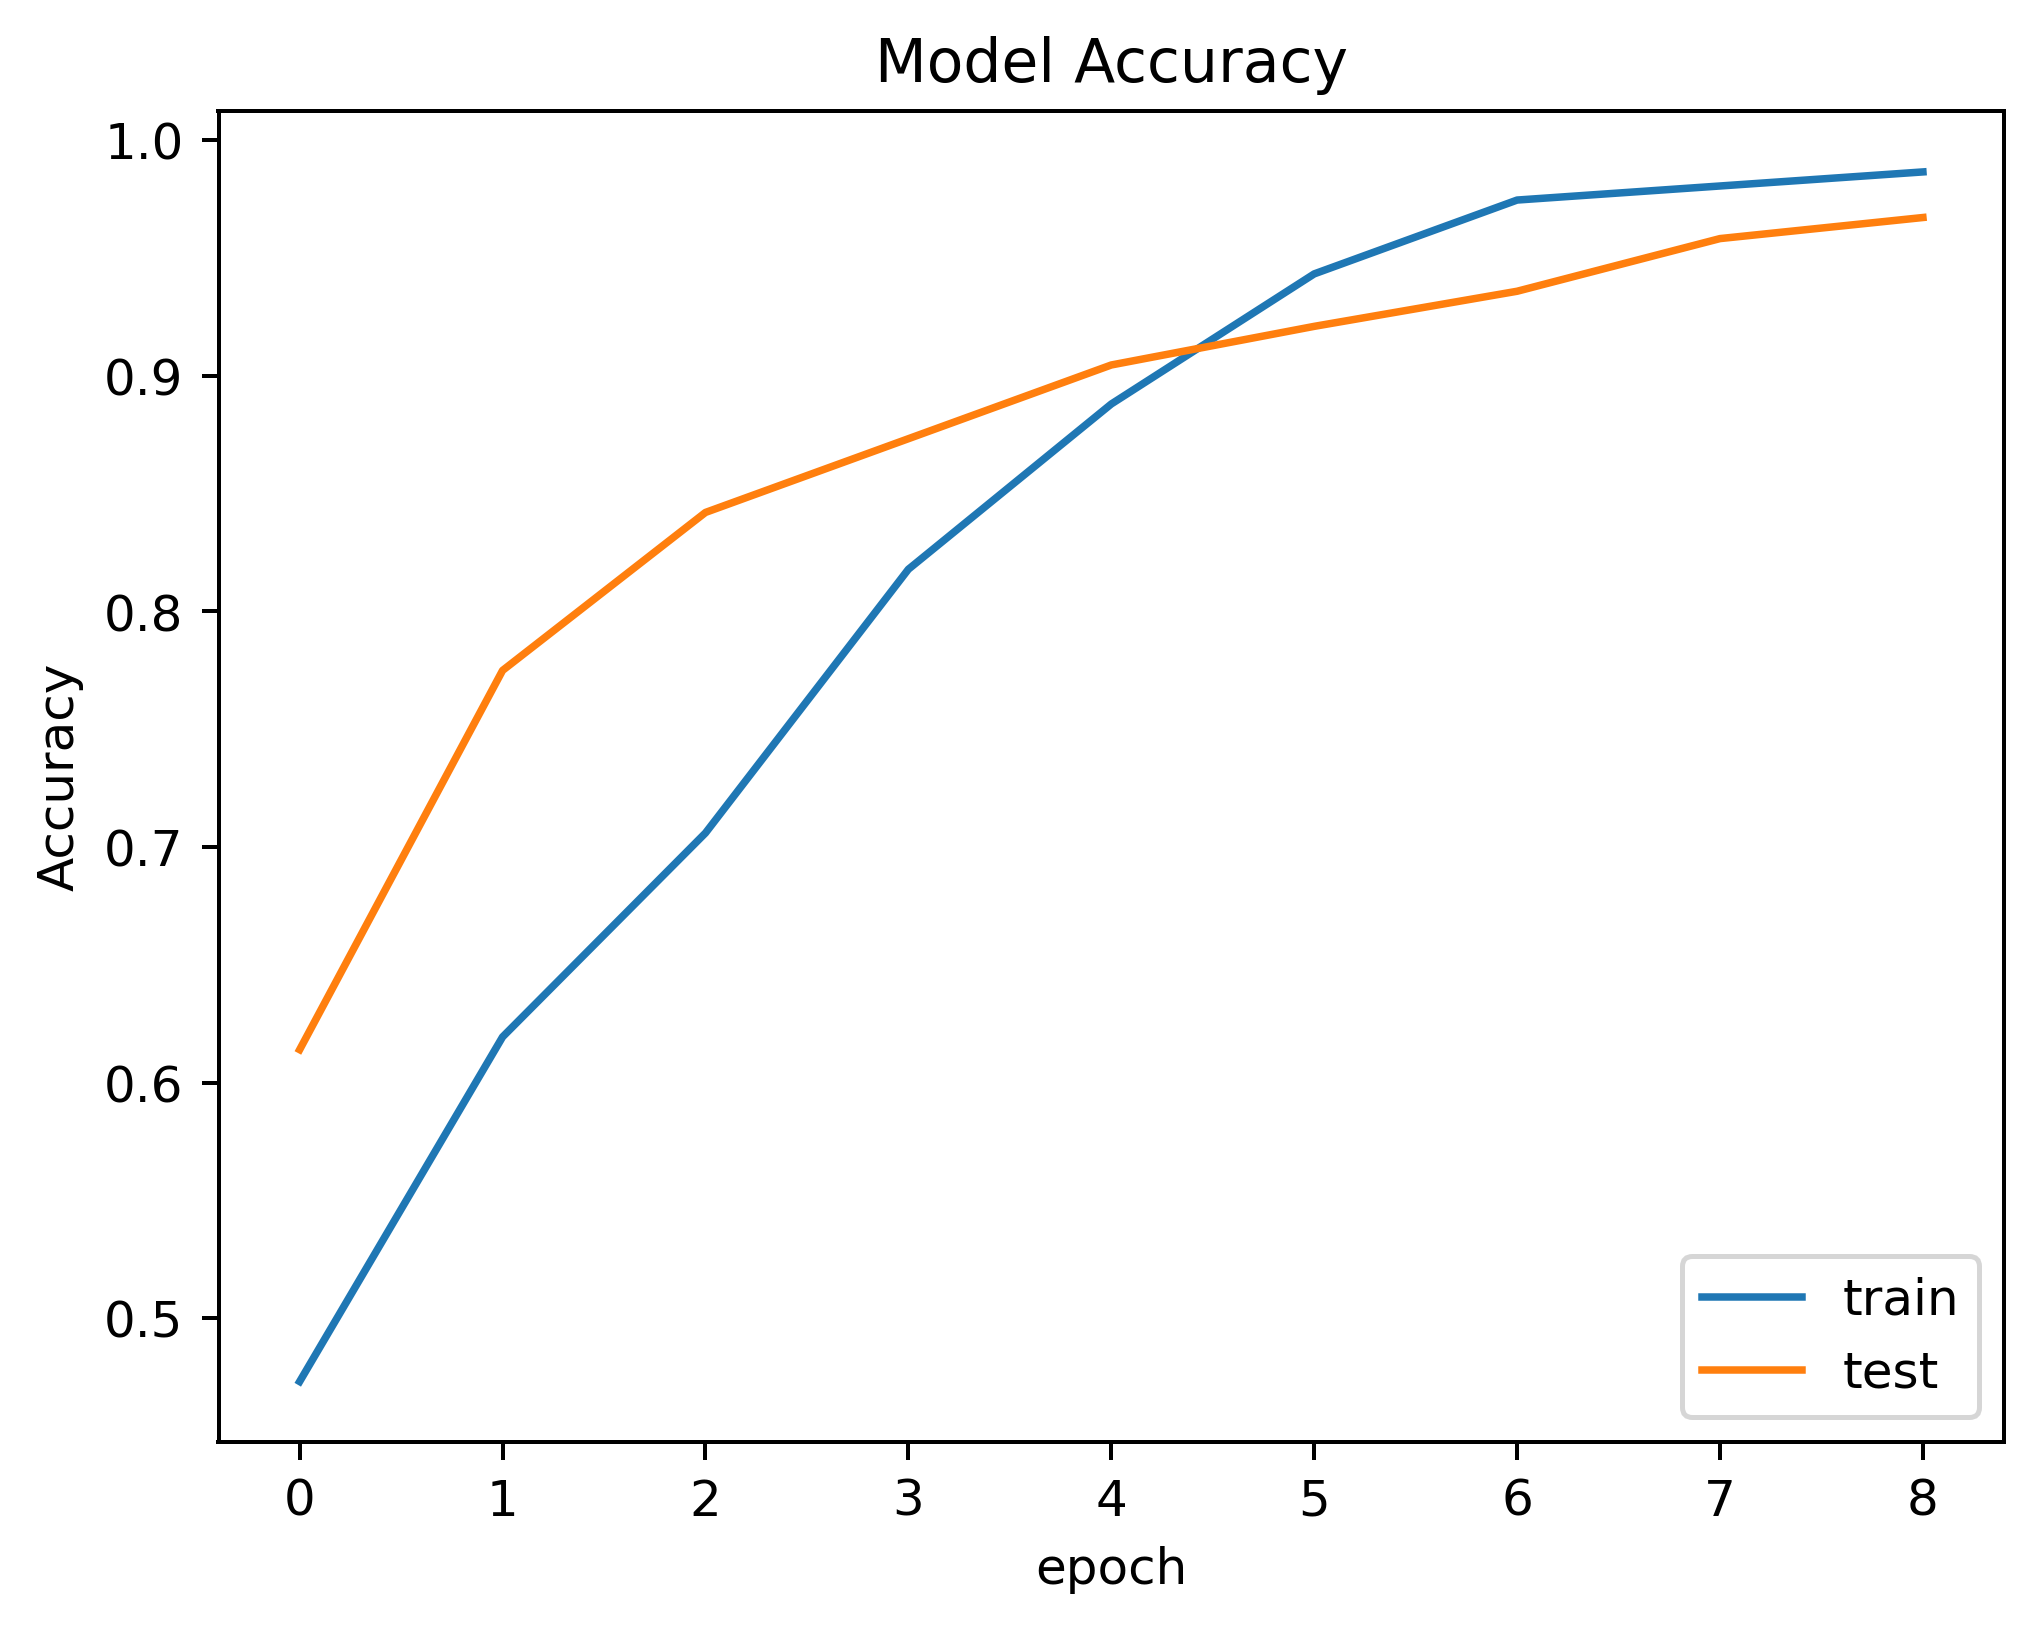

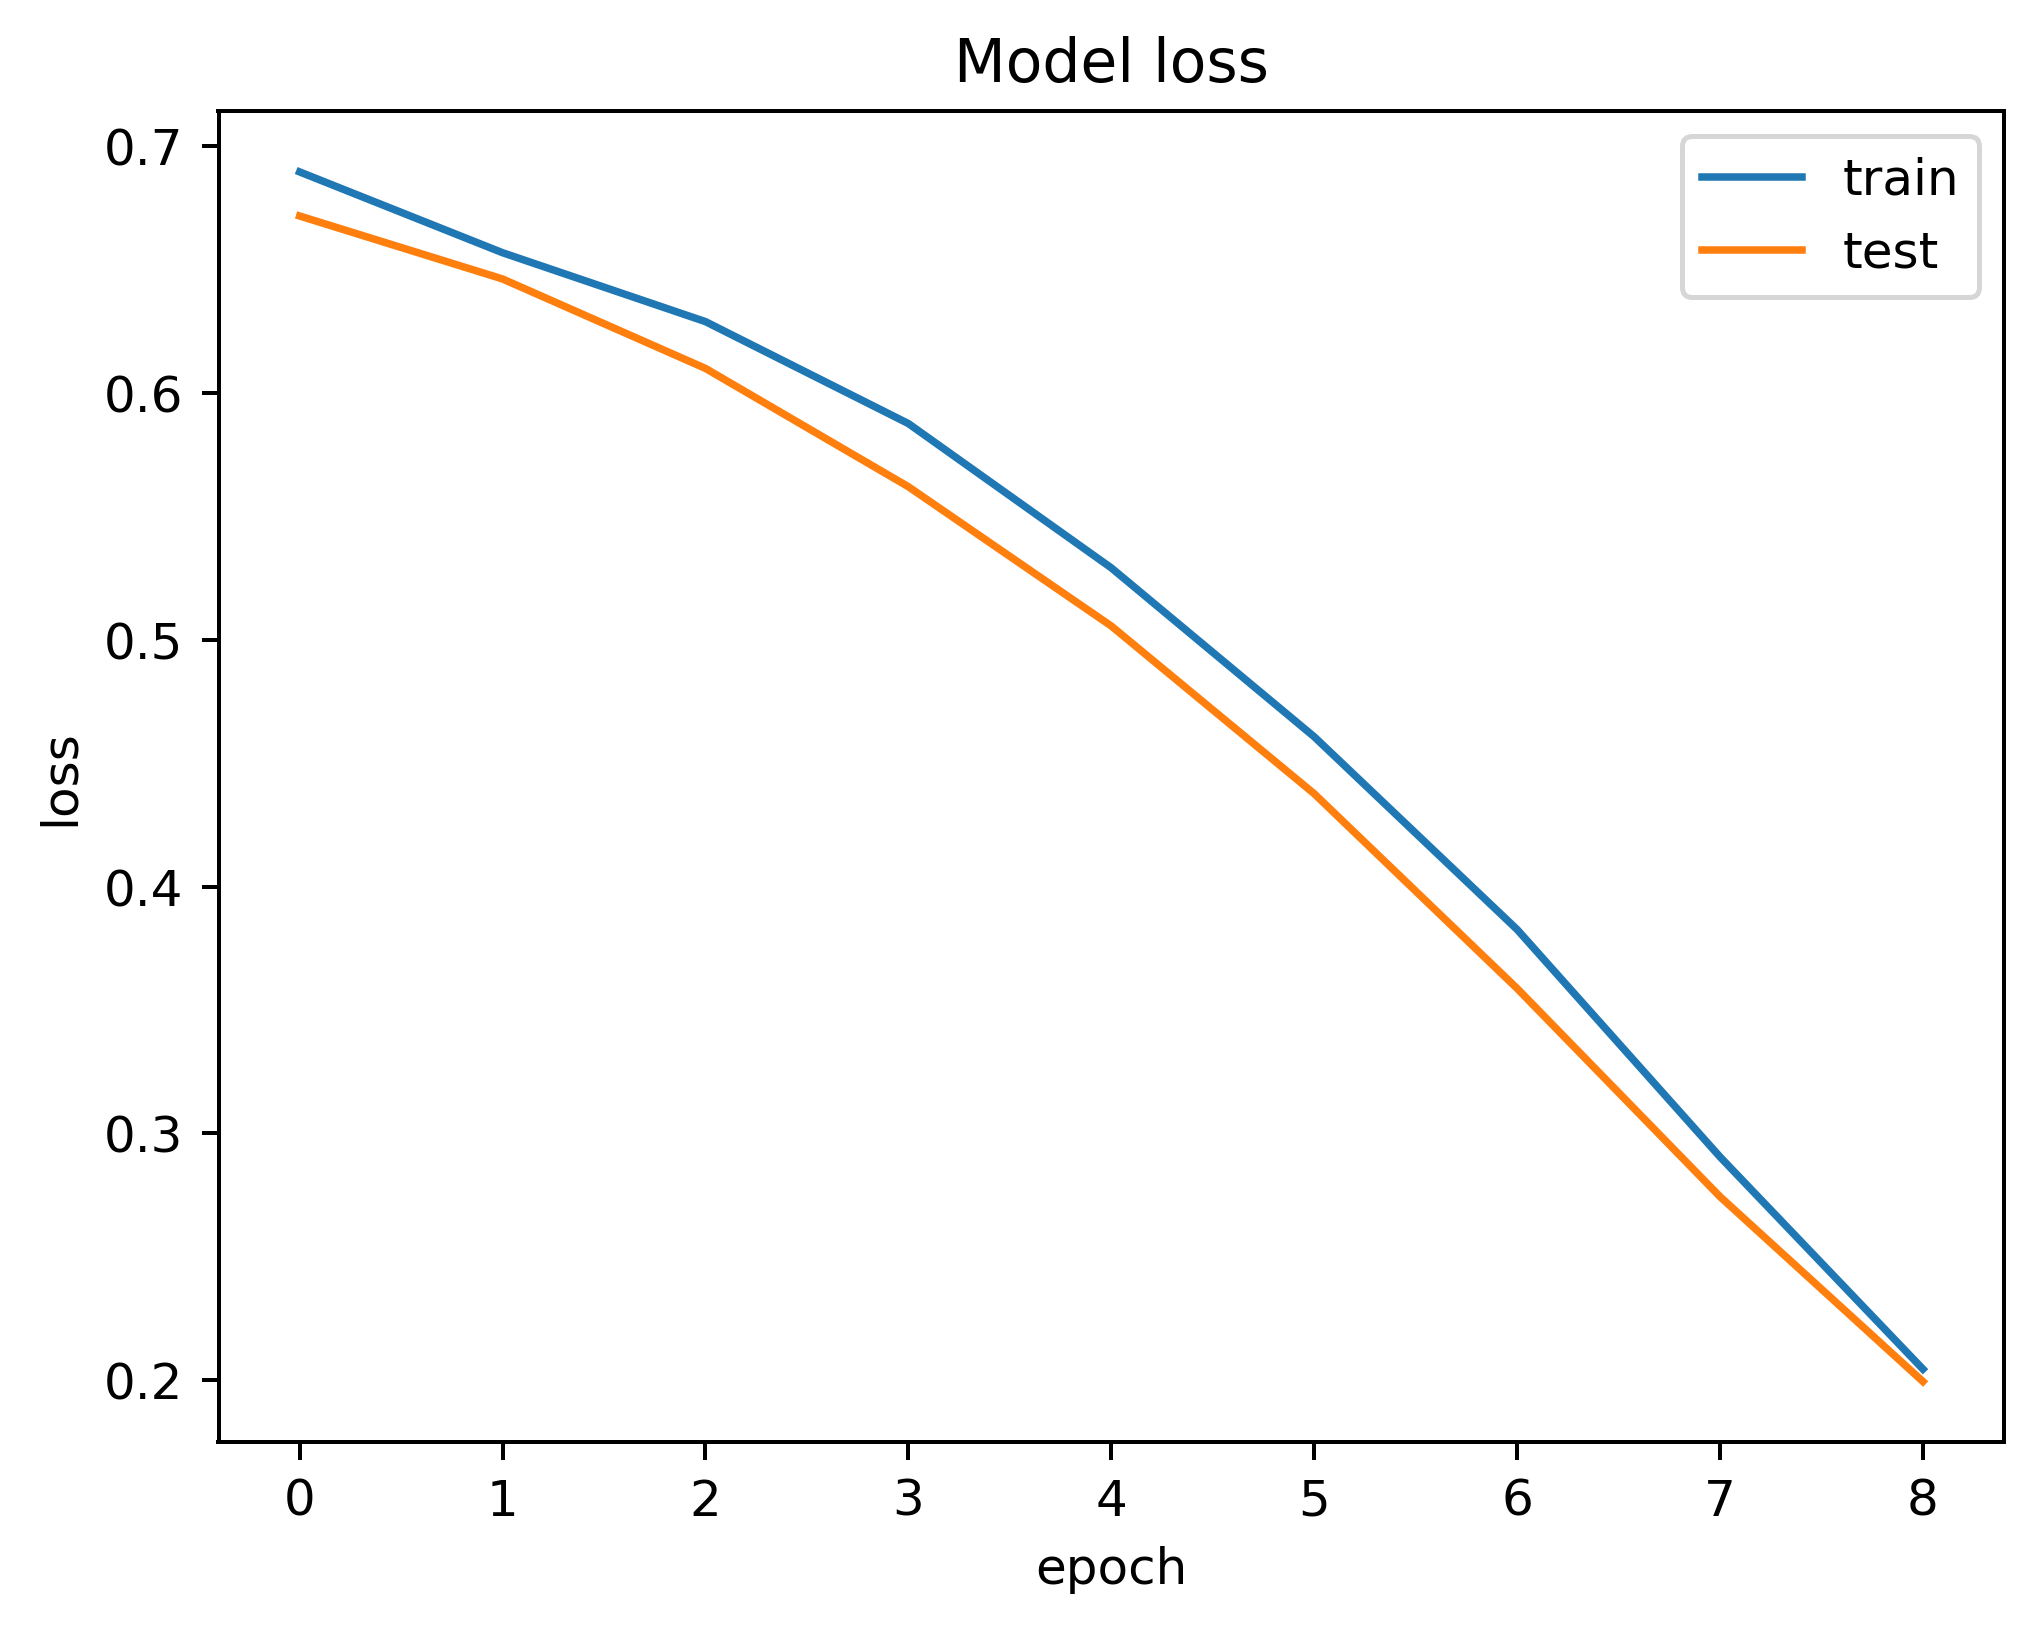

In [ ]:
# summarize history for acc
plt.rcParams["figure.dpi"] = 360
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.rcParams["figure.dpi"] = 360
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

21/21 [==============================] - 0s 6ms/step


In [ ]:
y_pred.sum()

299

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)

Accuracy: 0.9672131147540983
Precision: 0.9464882943143813
Recall: 0.9792387543252595
F1: 0.9625850340136054


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[366,  16],
       [  6, 283]])

In [ ]:
from sklearn.metrics import classification_report
# classification_report(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       382
           1       0.95      0.98      0.96       289

    accuracy                           0.97       671
   macro avg       0.97      0.97      0.97       671
weighted avg       0.97      0.97      0.97       671



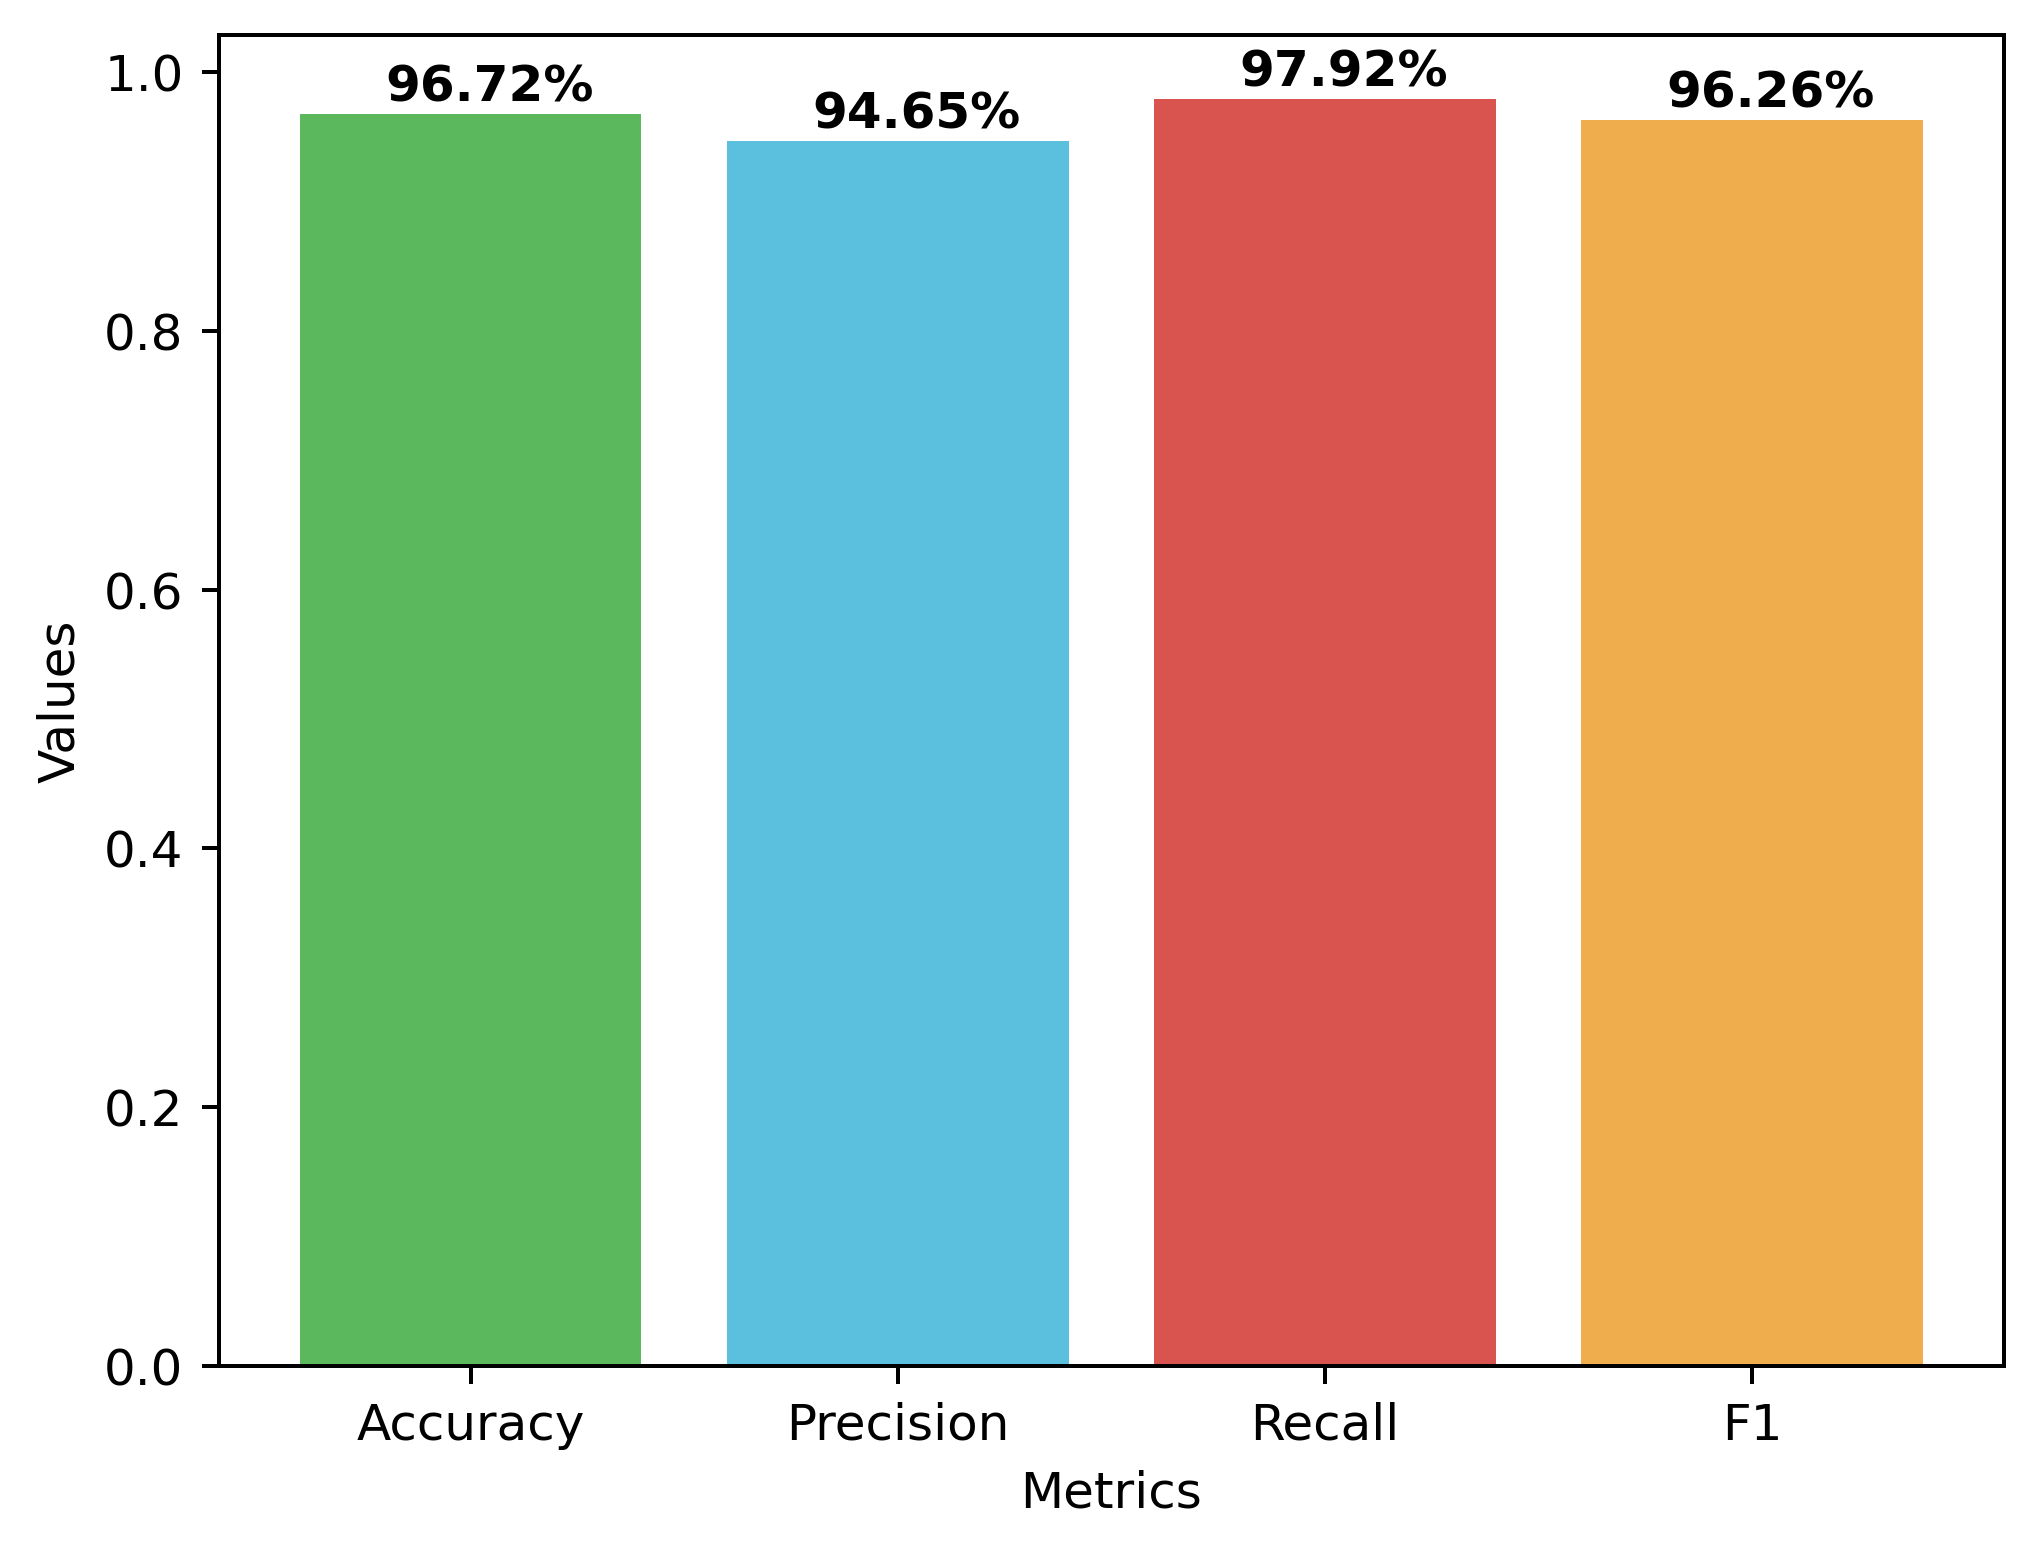

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [accuracy, precision, recall, f1]
colors = ['#5cb85c', '#5bc0de', '#d9534f','#f0ad4e']

# create the figure and axes
plt.rcParams["figure.dpi"] = 360
fig, ax = plt.subplots()

# create the bar chart
ax.bar(metrics, values, color=colors)

# add the labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Add percentage values inside the bars
for i, v in enumerate(values):
    ax.text(i - 0.2, v + 0.01, f'{v * 100:.2f}%', fontweight='bold')

# display the chart
plt.show()

1
dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])
{'_stale': True, 'stale_callback': <function _stale_axes_callback at 0x7fa2095d6ee0>, '_axes': <matplotlib.axes._axes.Axes object at 0x7fa1194dc5e0>, 'figure': <Figure size 3600x2520 with 1 Axes>, '_transform': <matplotlib.transforms.CompositeGenericTransform object at 0x7fa1193a3190>, '_transformSet': True, '_visible': True, '_animated': False, '_alpha': None, 'clipbox': <matplotlib.transforms.TransformedBbox object at 0x7fa11a41d3d0>, '_clippath': None, '_clipon': True, '_label': '', '_picker': None, '_contains': None, '_rasterized': None, '_agg_filter': None, '_mouseover': False, 'eventson': False, '_oid': 0, '_propobservers': {}, '_remove_method': <built-in method remove of list object at 0x7fa119520b80>, '_url': None, '_gid': None, '_snap': None, '_sketch': None, '_path_effects': [], '_sticky_edges': _XYPair(x=[], y=[]), '_in_layout': True, '_hatch_color': (0.0, 0.0, 0.0, 1.0), '_fill': True, '_original_edgec

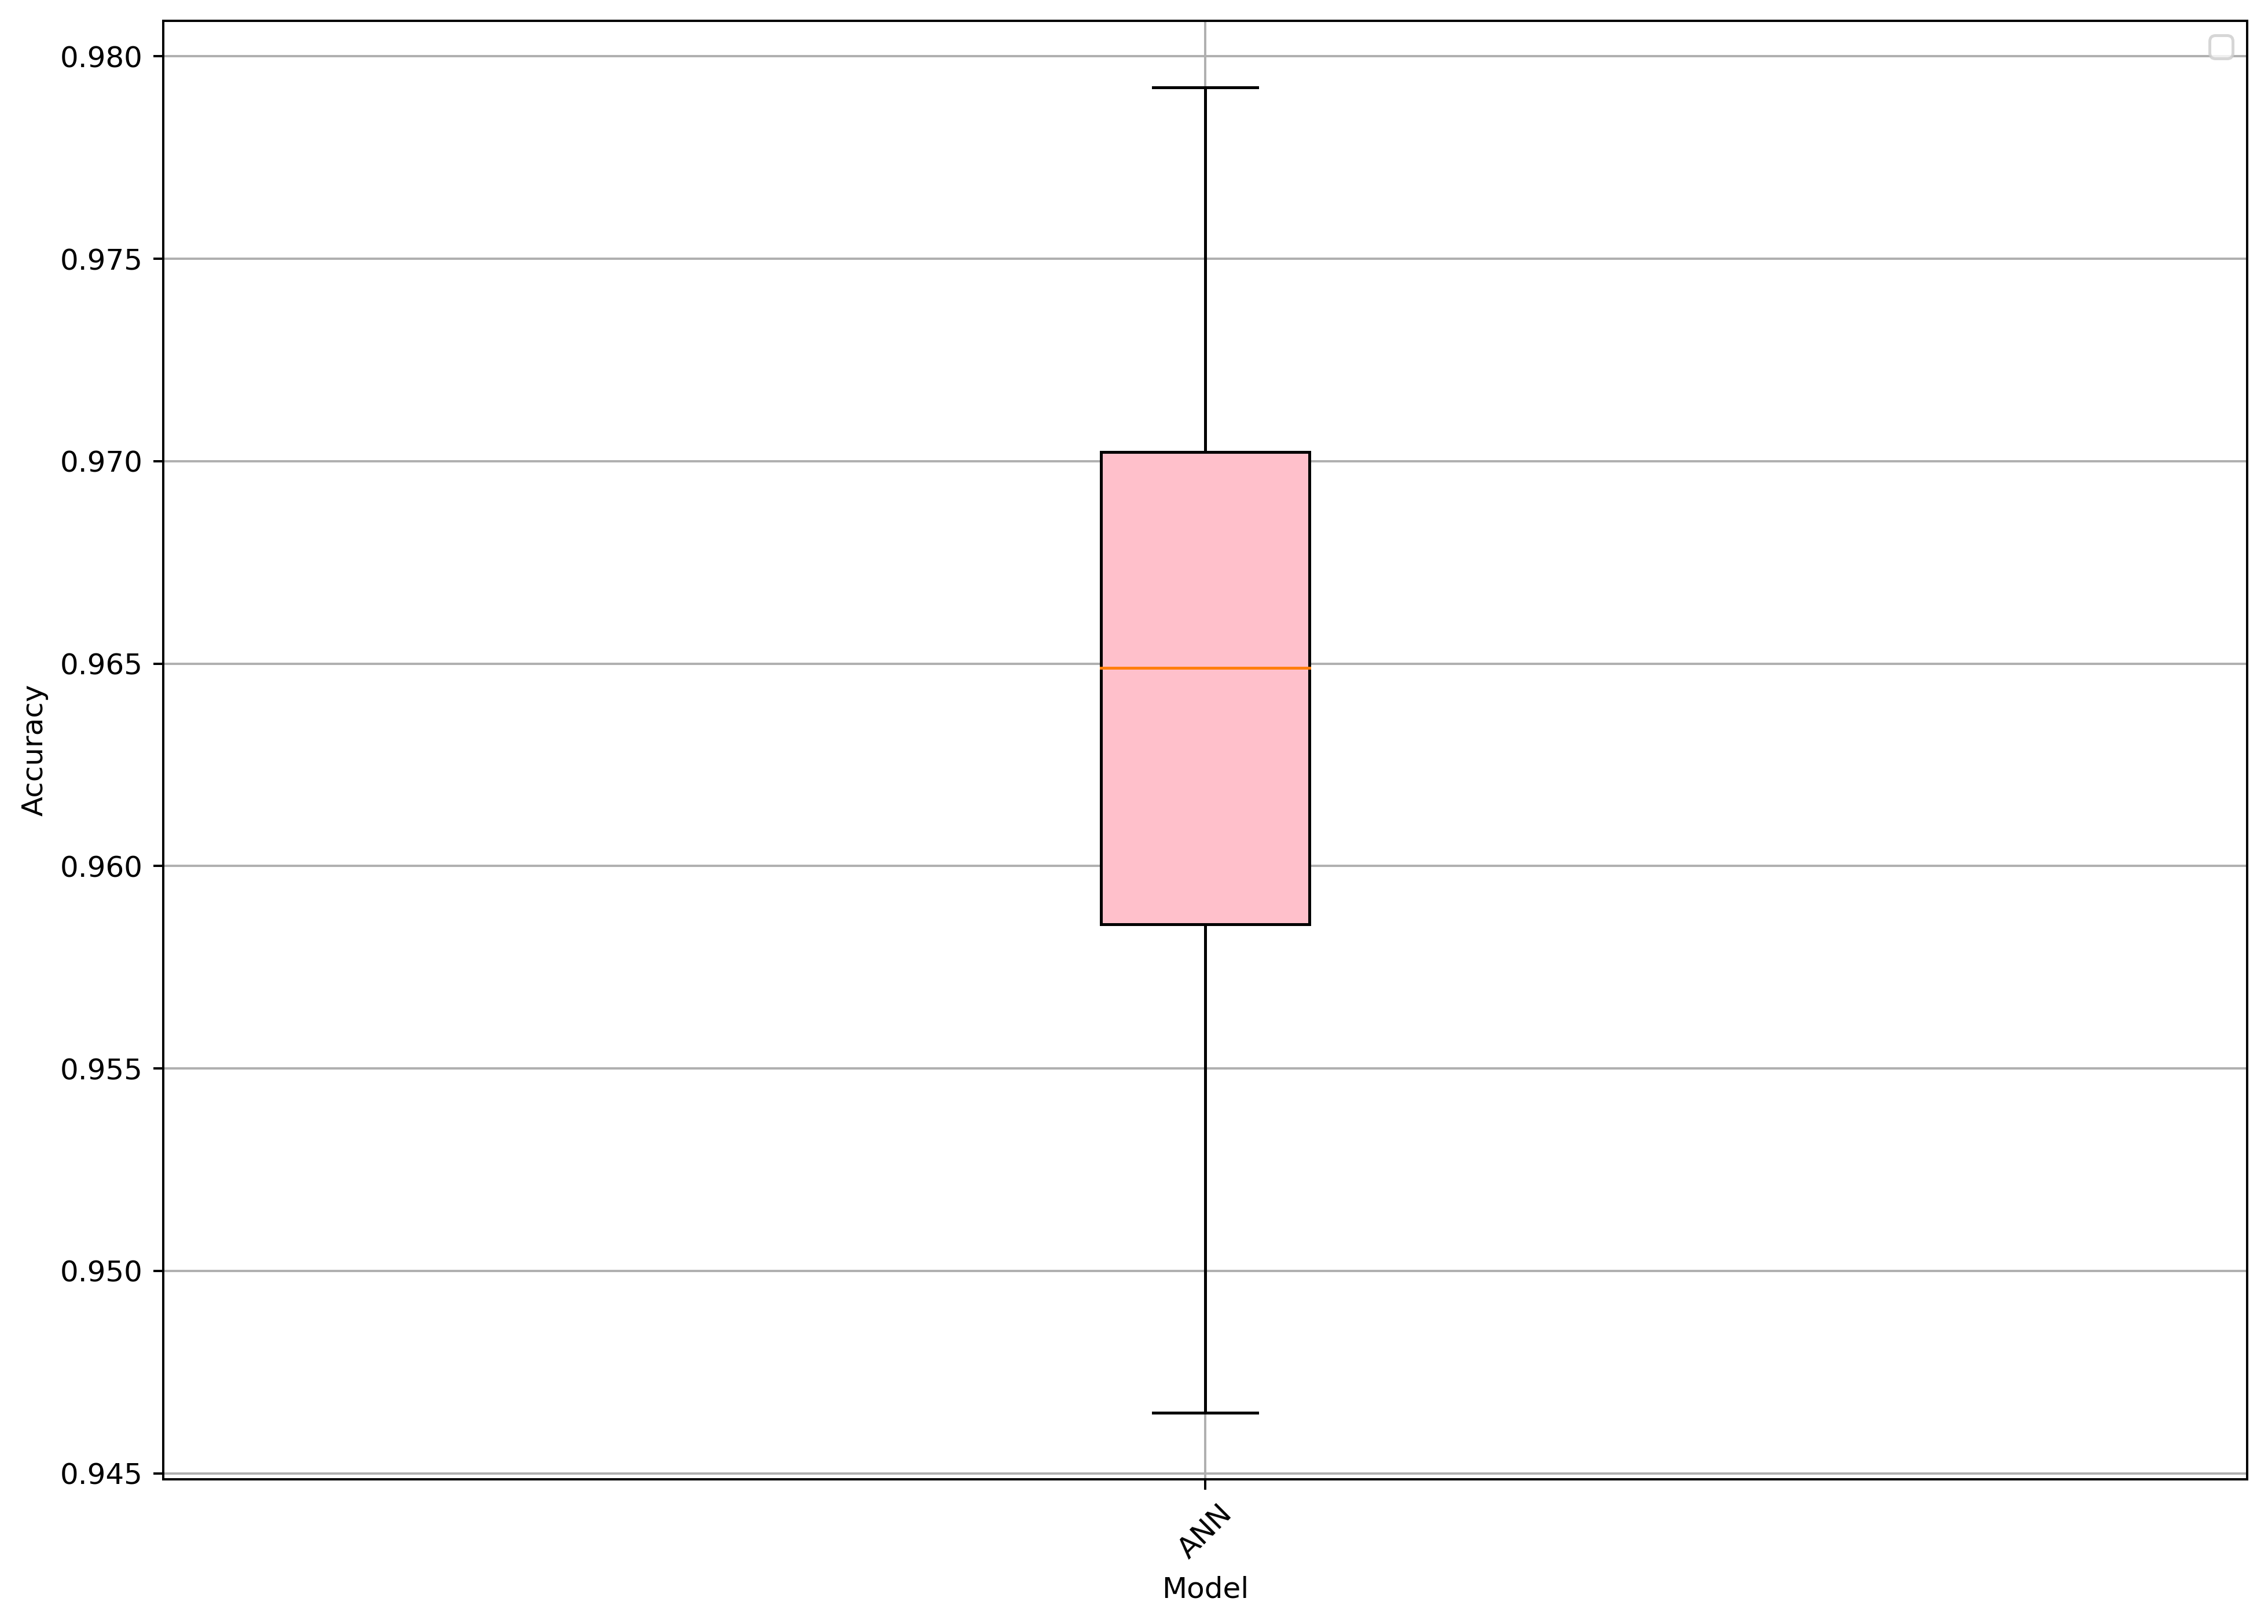

In [ ]:
plt.style.use('default')

# plt.style.use('ggplot')

plt.rcParams["figure.dpi"] = 360

#print(len(accss_transpose_selected))

#x = np.arange(len(accss_transpose_selected))

Method = [
    'ANN'
    # 'LR', 
    # 'SVR', 
    # 'KNNR', 
    # 'DTR', 
    # 'GBR', 
    # 'RFR', 
    # 'ABR', 
    # 'LLR', 
    # 'XBR', 
    # 'NR',
          ]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

x_axis = np.arange(1,len(Method)+1)

width = 0.1
 
# Creating plot
bpA = ax.boxplot(values, widths=width, patch_artist=True, positions=x_axis)
plt.xticks(x_axis, Method, rotation = 45)

boxes = bpA['boxes']

print(len(boxes))

patch = boxes[0]

print(bpA.keys())
print(patch.__dict__)
print(dir(patch))

# fill with colors
colors = [
    'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # 'pink', 
    # # 'pink', 
    # 'pink', 
    ]

for patch, color in zip(boxes, colors):
    patch.set_facecolor(color)

#ax.set_title('KNN Accuracy by Data Size and Undersampling Method', size=24)
#ax.set_ylabel('Score', size=24)
#ax.set_xlabel('Model(Data Size) + Undersampling Method', size=24)
#ax.set_xticks(x+1, range(min,(min*n)+1,min))
# ax.scatter(x_axis-width, HasilA, color="pink", label="CV = 2")
ax.legend()
ax.set_xlabel("Model")
# ax.set_ylabel("$R^2$")
ax.set_ylabel("Accuracy")
plt.grid()
plt.show()

Accuracy Score: 96.72131147540983 %


Text(0.5, 134.59999999999997, 'Predicted')

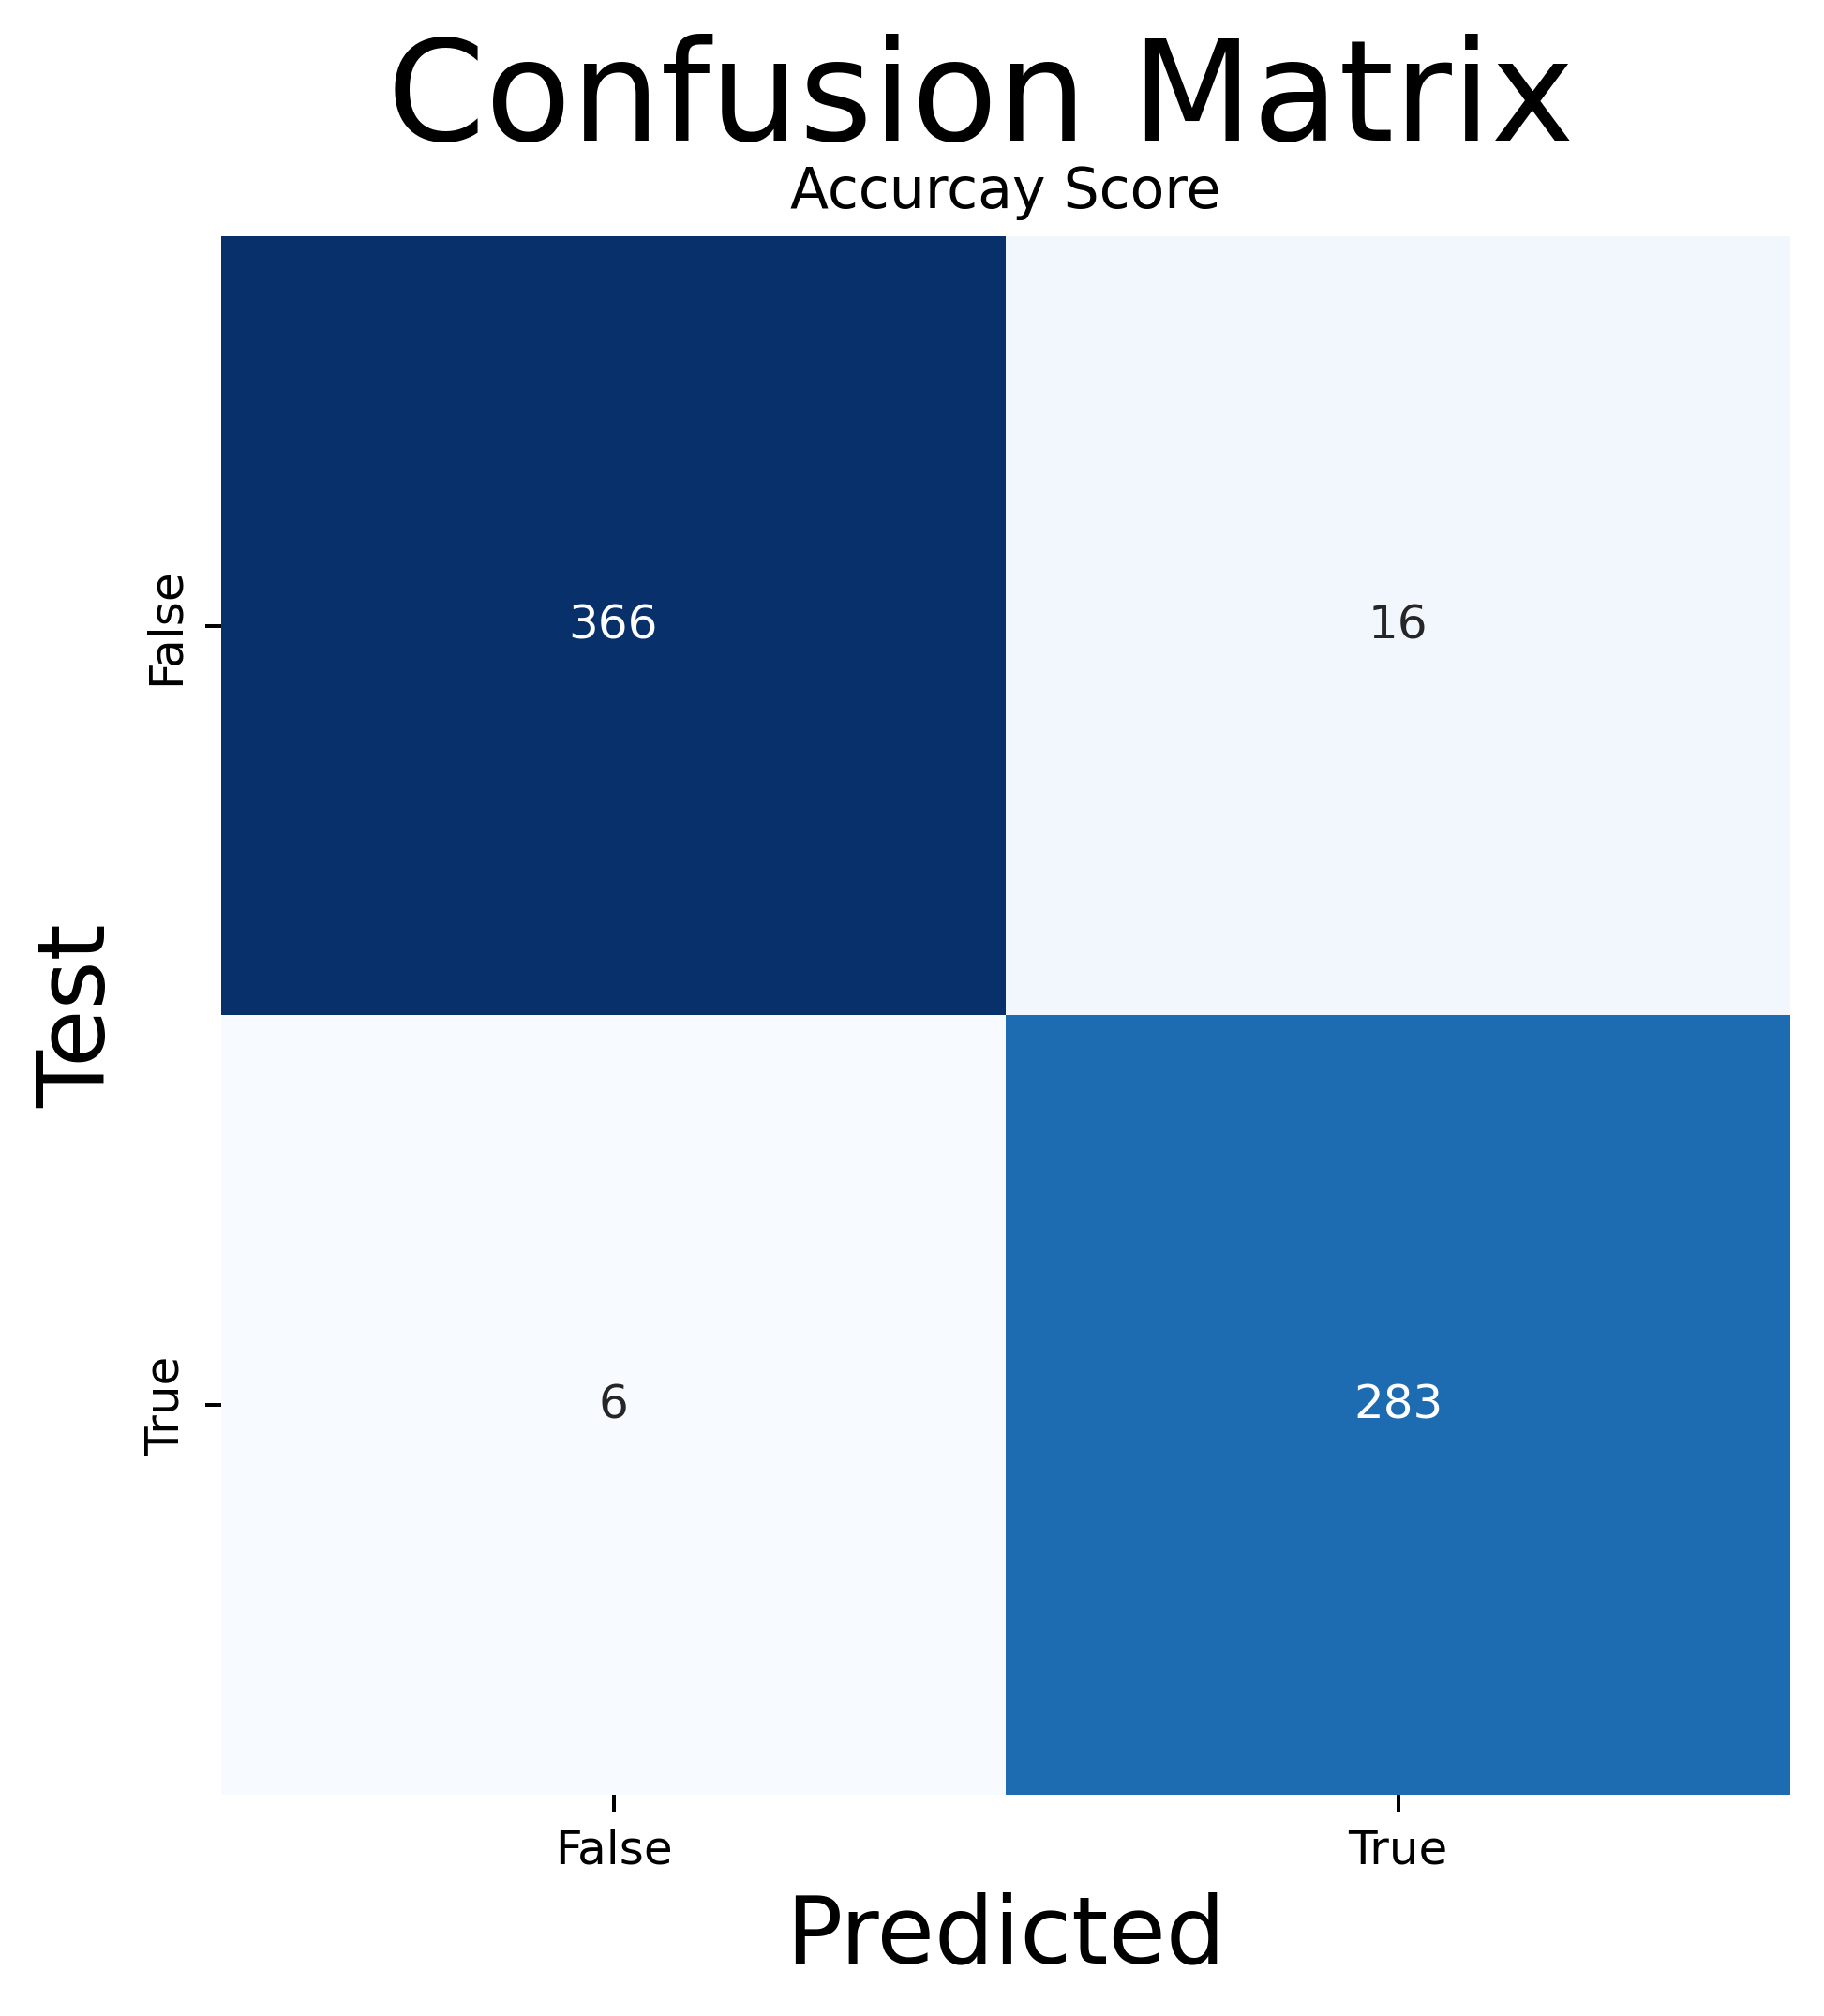

In [ ]:
print("Accuracy Score:", accuracy_score(y_test,y_pred)*100,"%")

fig, ax = plt.subplots(1,figsize=(6,6))
plt.rcParams["figure.dpi"] = 360
labels=['False','True']
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False,ax=ax)
plt.suptitle('Confusion Matrix', fontsize=30)
ax.set_title('Accurcay Score')
ax.set_yticklabels(labels);
ax.set_xticklabels(labels);
ax.set_ylabel('Test',fontsize=20)
ax.set_xlabel('Predicted',fontsize=20)